### About Dataset:
## Vehicle Insurance Fraud Detection
Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated.

## About this dataset
This dataset contains vehicle dataset - attribute, model, accident details, etc along with policy details - policy type, tenure etc. The target is to detect if a claim application is fraudulent or not - FraudFound_P

In [133]:
# Libraries
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import HTML, display
from datetime import timedelta
from pathlib import Path
import pickle 

# ML libraries:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import RFECV

#ML models:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics:
from sklearn.metrics import roc_curve, classification_report, accuracy_score, roc_auc_score, recall_score, confusion_matrix

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] = 16
plt.style.use('bmh')
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', 30)
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(precision=6, suppress=True)
%matplotlib inline

# Automated ML
from ydata_profiling import ProfileReport
#ignore warnings:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Base directory:
BASE_DIR = Path().resolve(strict=True)

In [3]:
data = pd.read_csv(f"{BASE_DIR}/raw_data.csv")

In [4]:
df = data.copy()

# EDA

In [5]:
df.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  Age          Fault  \
0          Jan                   1  Female        Single   21  Policy Holder   
1          Jan                   4    Male        Single   34  Policy Holder   
2          Nov                   2    Male       Married   47  Policy Holder   
3          Jul                   1    Male       Married   65    Third Party   
4          Feb                   2  Female        Single   27    Third Party   

          PolicyType VehicleCategory     VehiclePrice  ...  Deductible  \
0  Sport - Liability           Sport  more than 69000  ...         300   
1  Sport - Collision           Sport  more than 69000  ...         400   
2  Sport - Collision           Sport  more than 69000  ...         400   
3  Sedan - Liability           Sport   20000 to 29000  ...         400   
4  Sport - Collision           Sport  more than 69000  ...         400   

   DriverRating  Days_Policy_Accident  Days_Policy_Claim  PastNumberOfClaims  \
0             1          more than 30       more than 30                none   
1             4          more than 30       more than 30                none   
2             3          more than 30       more than 30                   1   
3             2          more than 30       more than 30                   1   
4             1          more than 30       more than 30                none   

  AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0      3 years          26 to 30                No             No  External   
1      6 years          31 to 35               Yes             No  External   
2      7 years          41 to 50                No             No  External   
3  more than 7          51 to 65               Yes             No  External   
4      5 years          31 to 35                No             No  External   

  NumberOfSuppliments AddressChange_Claim NumberOfCars  Year BasePolicy  
0                none              1 year       3 to 4  1994  Liability  
1                none           no change    1 vehicle  1994  Collision  
2                none           no change    1 vehicle  1994  Collision  
3         more than 5           no change    1 vehicle  1994  Liability  
4                none           no change    1 vehicle  1994  Collision  

[5 rows x 33 columns]

In [6]:
df.shape

(15420, 33)

In [7]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [10]:
df.describe().T

count      mean       std       min       25%  \
WeekOfMonth        15420.0000    2.7886    1.2876    1.0000    2.0000   
WeekOfMonthClaimed 15420.0000    2.6940    1.2591    1.0000    2.0000   
Age                15420.0000   39.8557   13.4924    0.0000   31.0000   
FraudFound_P       15420.0000    0.0599    0.2372    0.0000    0.0000   
PolicyNumber       15420.0000 7710.5000 4451.5149    1.0000 3855.7500   
RepNumber          15420.0000    8.4833    4.5999    1.0000    5.0000   
Deductible         15420.0000  407.7043   43.9510  300.0000  400.0000   
DriverRating       15420.0000    2.4878    1.1195    1.0000    1.0000   
Year               15420.0000 1994.8665    0.8033 1994.0000 1994.0000   

                         50%        75%        max  
WeekOfMonth           3.0000     4.0000     5.0000  
WeekOfMonthClaimed    3.0000     4.0000     5.0000  
Age                  38.0000    48.0000    80.0000  
FraudFound_P          0.0000     0.0000     1.0000  
PolicyNumber       7710.5000 11565.2500 15420.0000  
RepNumber             8.0000    12.0000    16.0000  
Deductible          400.0000   400.0000   700.0000  
DriverRating          2.0000     3.0000     4.0000  
Year               1995.0000  1996.0000  1996.0000

<Axes: title={'center': 'Target distribution'}, ylabel='count'>

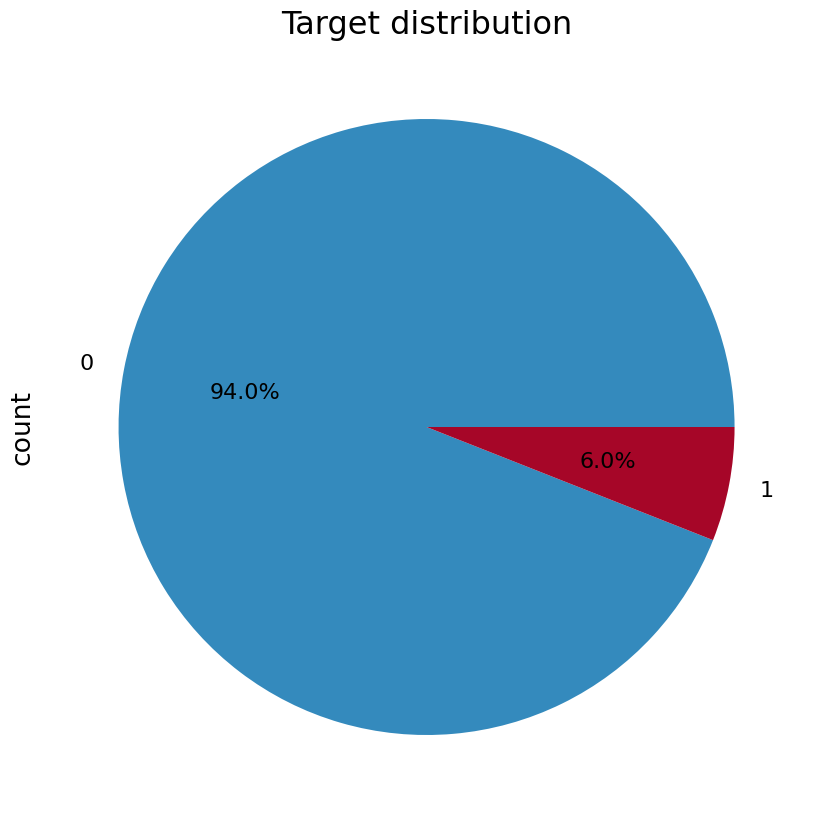

In [11]:
# Balance of target:
target = df['FraudFound_P']
target.value_counts().plot(kind='pie', autopct='%1.1f%%', title = 'Target distribution')

### Notes:
-target is higly inbalanced!

In [12]:
#Let's make a quick look at dataset using 
ProfileReport(data)
profile = ProfileReport(data, title = 'Pandas Profiling Report')
profile
profile.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
#Allert: in DayOfWeekClaimed is more than 7 unique values:
df['DayOfWeekClaimed'].value_counts()

DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: count, dtype: int64

In [14]:
#Allert: in MonthClaimed is more than 12 unique values:
df['MonthClaimed'].value_counts()

MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: count, dtype: int64

In [15]:
#that anomaly is located in 1516 label:
df[df['DayOfWeekClaimed'] == '0'].T

1516
Month                                Jul
WeekOfMonth                            2
DayOfWeek                         Monday
Make                               Honda
AccidentArea                       Rural
DayOfWeekClaimed                       0
MonthClaimed                           0
WeekOfMonthClaimed                     1
Sex                                 Male
MaritalStatus                     Single
Age                                    0
Fault                      Policy Holder
PolicyType            Sedan - All Perils
VehicleCategory                    Sedan
VehiclePrice             more than 69000
FraudFound_P                           0
PolicyNumber                        1517
RepNumber                             15
Deductible                           400
DriverRating                           2
Days_Policy_Accident        more than 30
Days_Policy_Claim                   none
PastNumberOfClaims                  none
AgeOfVehicle                         new
AgeOfPolicyHolder               16 to 17
PoliceReportFiled                     No
WitnessPresent                        No
AgentType                       External
NumberOfSuppliments                 none
AddressChange_Claim            no change
NumberOfCars                   1 vehicle
Year                                1994
BasePolicy                    All Perils

In [16]:
#because it is only one record - lets's remove it from dataset:
df = df.drop(index=1516)

In [17]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [18]:
# set 'WeekOfMonth', 'WeekOfMonthClaimed', 'DriverRating' as object:
df[['WeekOfMonth', 'WeekOfMonthClaimed', 'DriverRating']] = df[['WeekOfMonth', 'WeekOfMonthClaimed', 'DriverRating']].astype('object')

In [19]:
# Split columns for numerical and categorical:
num_col = list(df.select_dtypes(exclude='object').columns)
# num_col.remove('FraudFound_P')
                       
cat_col = list(df.select_dtypes(include='object').columns)

# set float and category typpes:
df[num_col] = df[num_col].astype('float')
df[cat_col] = df[cat_col].astype('category')

In [20]:
print(f'num_col: {num_col}')
print(f'cat_col: {cat_col}')

num_col: ['Age', 'FraudFound_P', 'PolicyNumber', 'RepNumber', 'Deductible', 'Year']
cat_col: ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


### Categorical data:

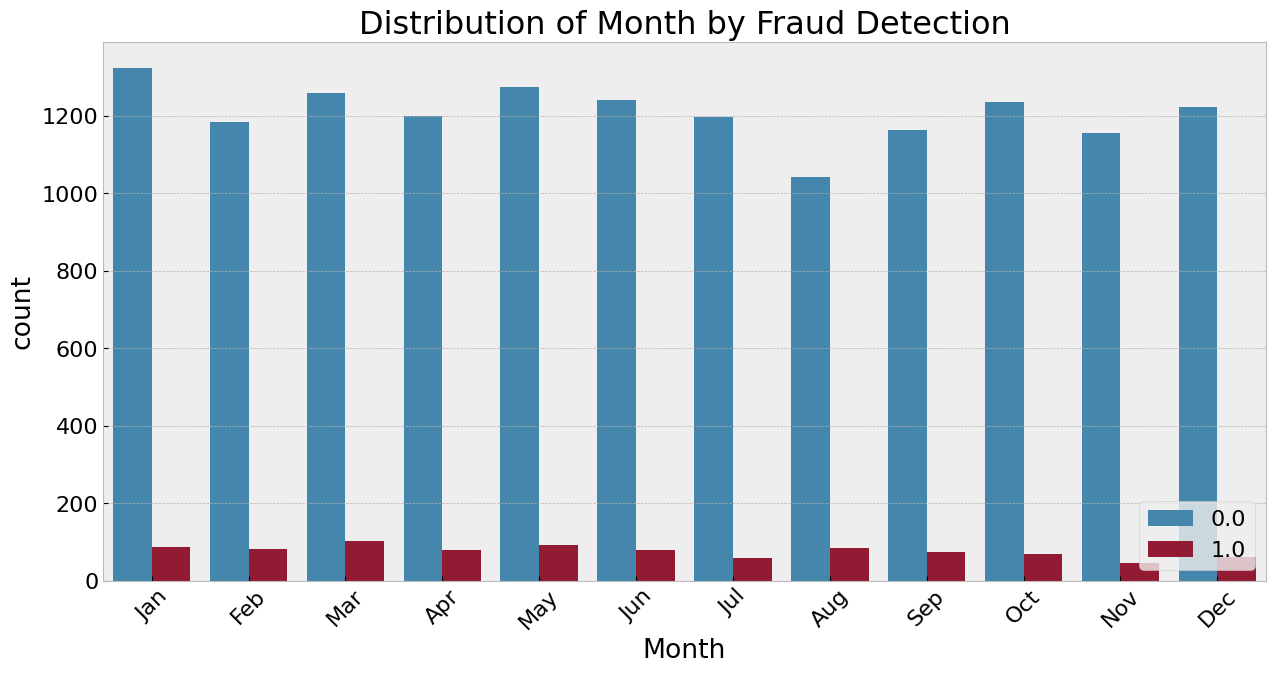

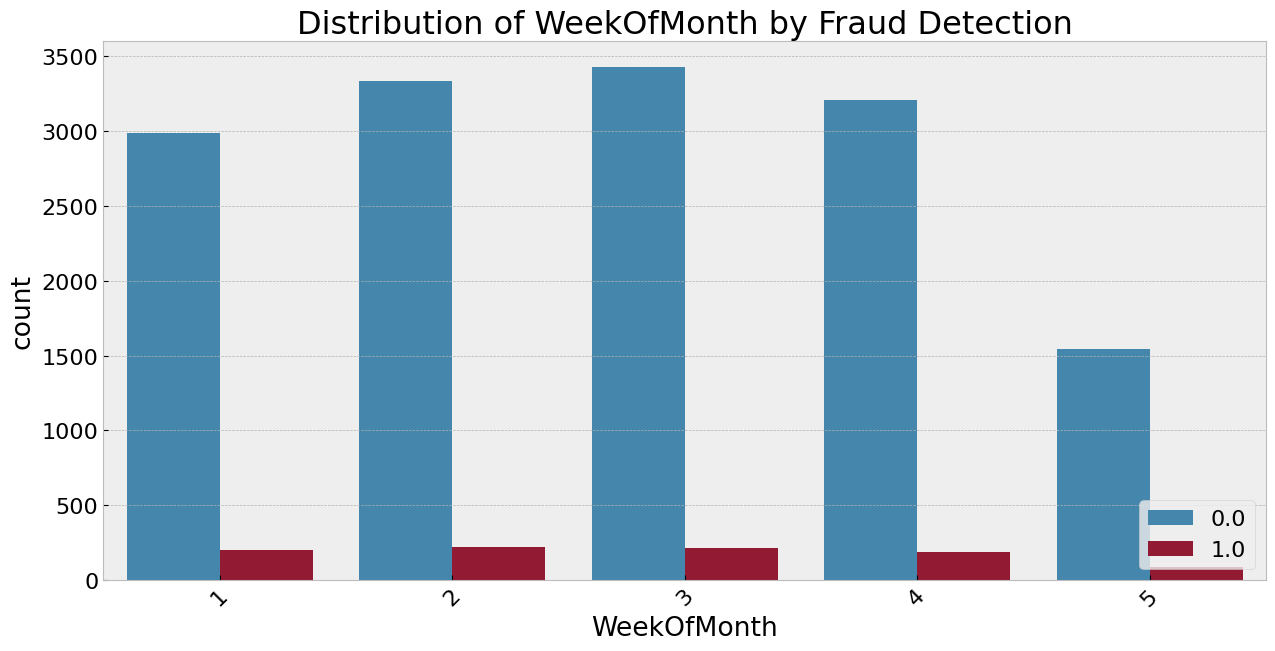

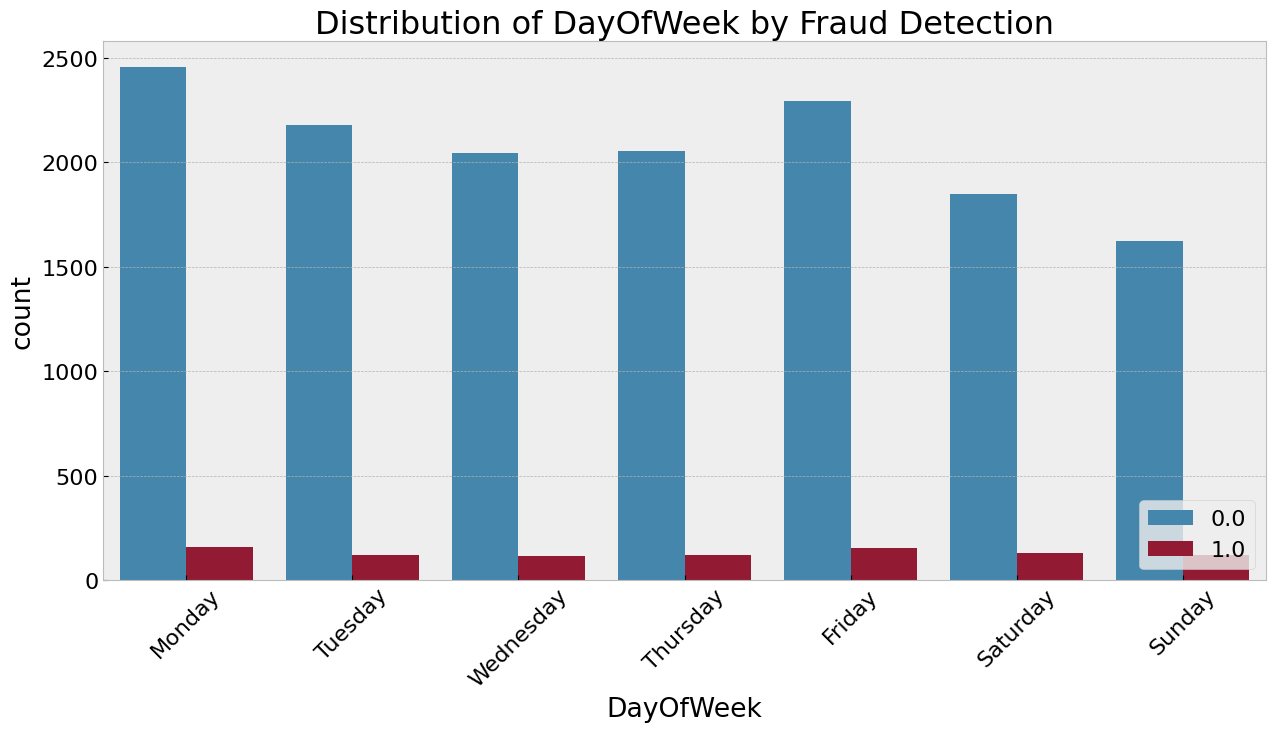

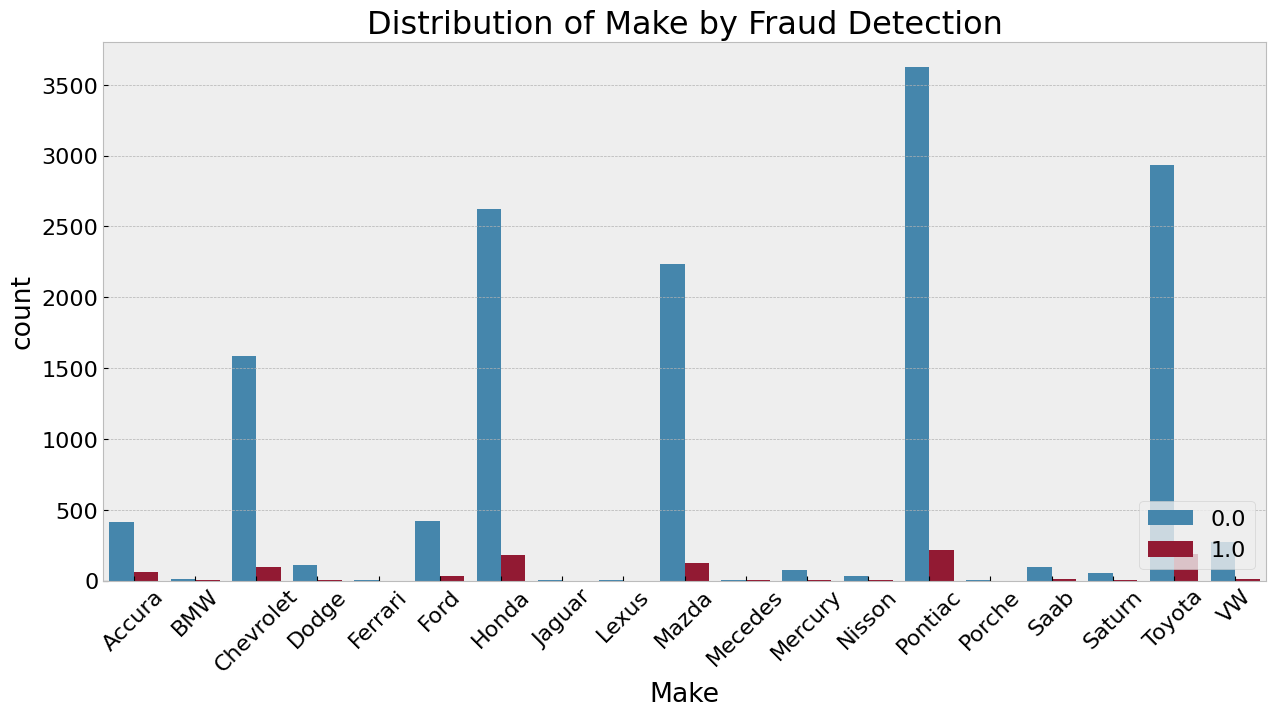

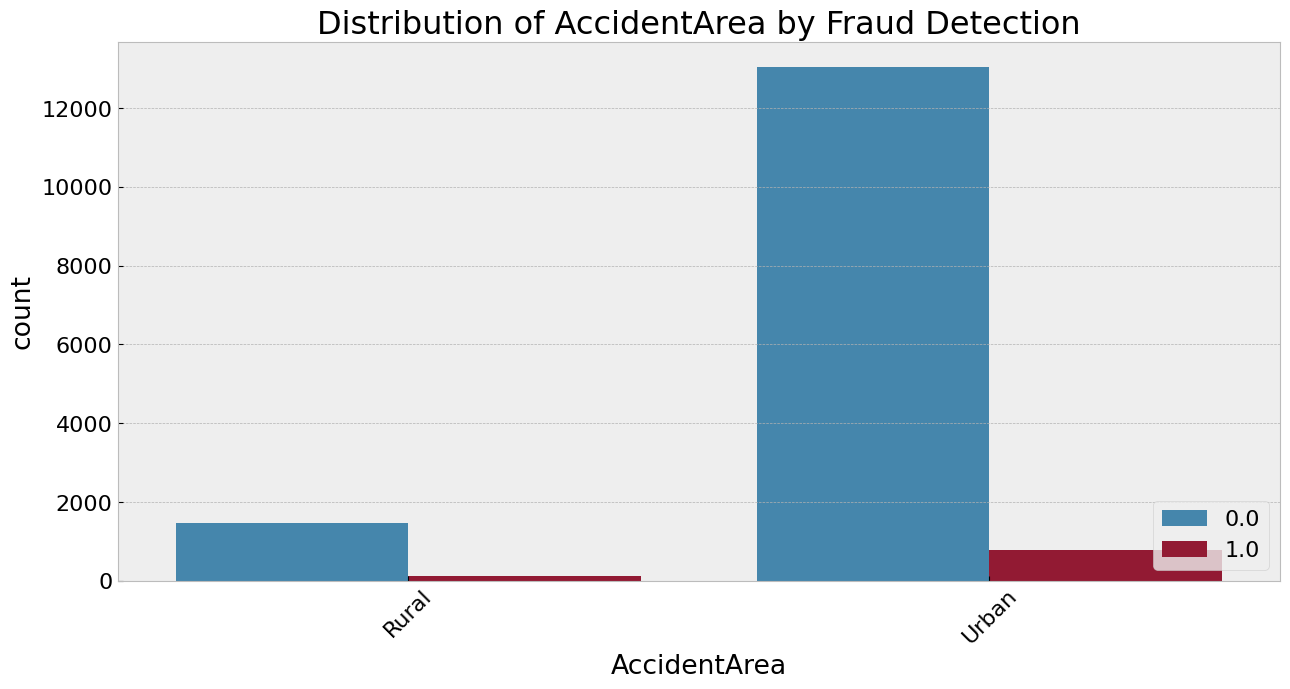

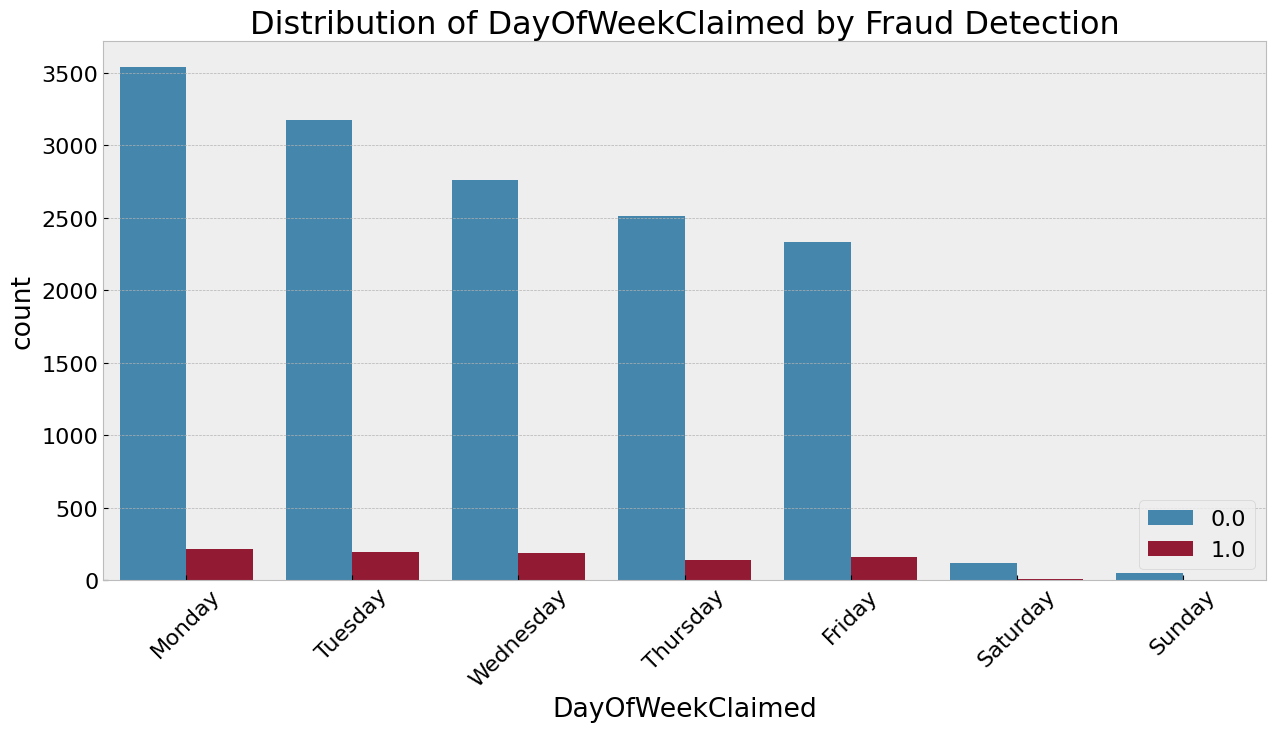

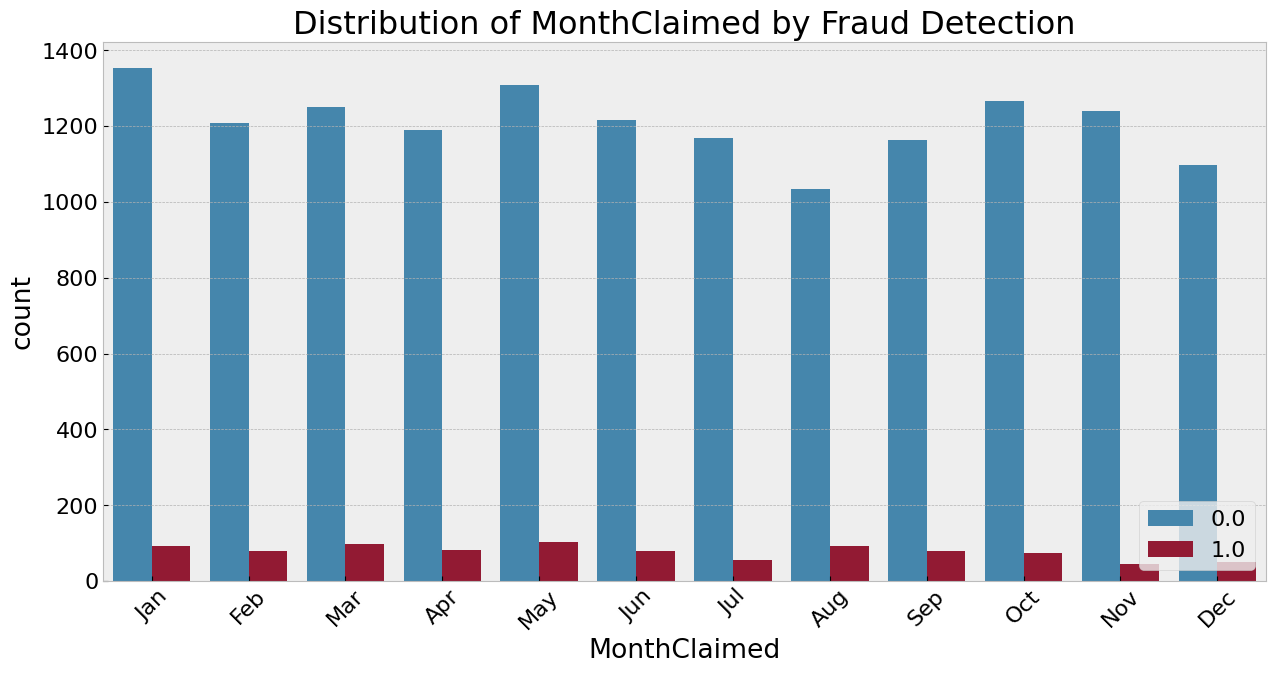

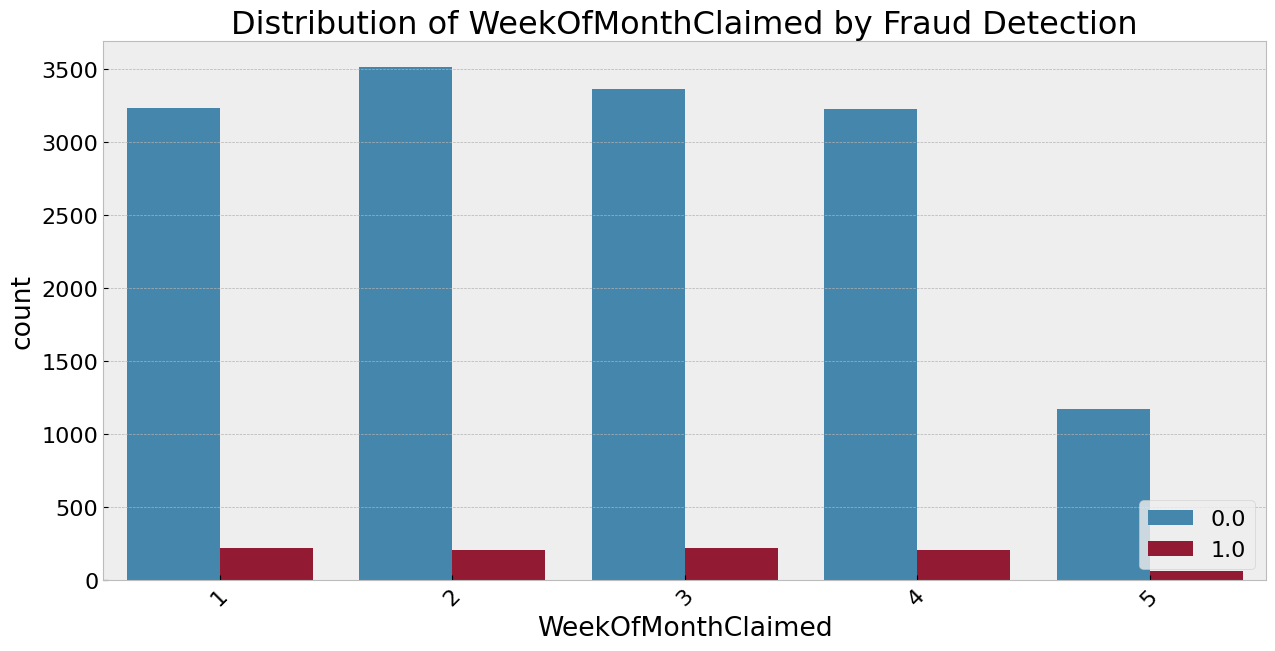

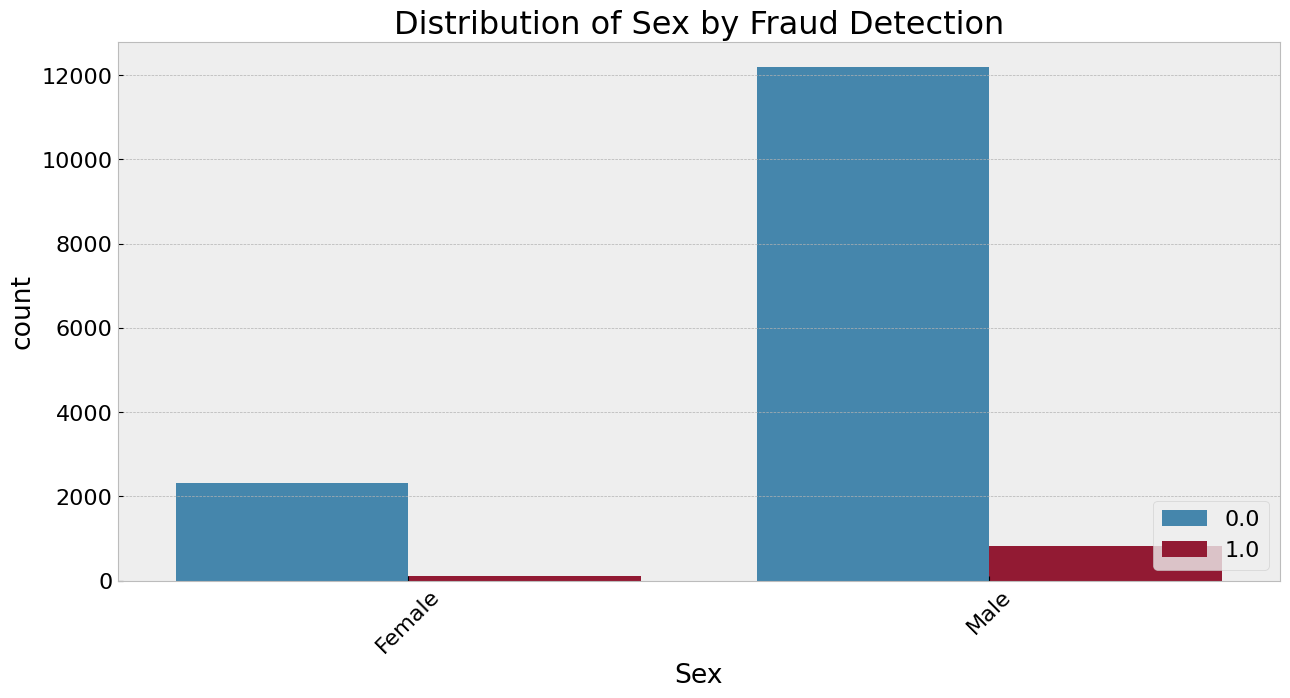

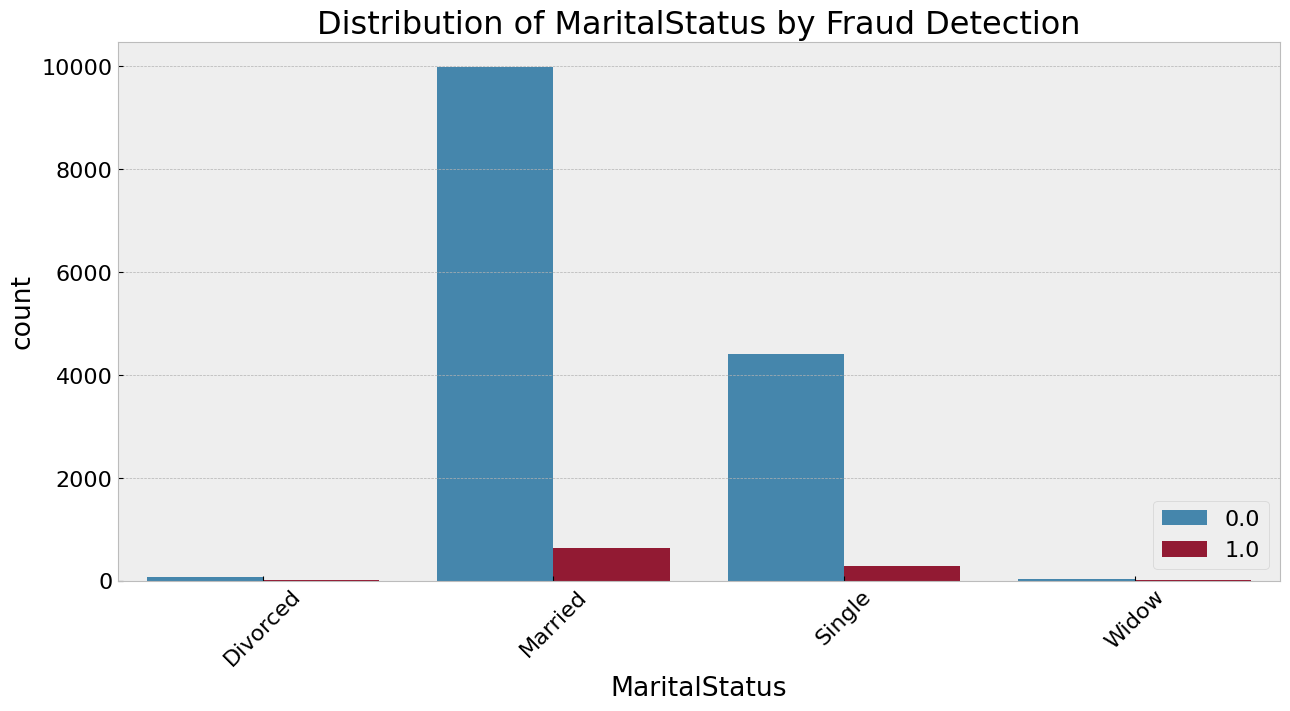

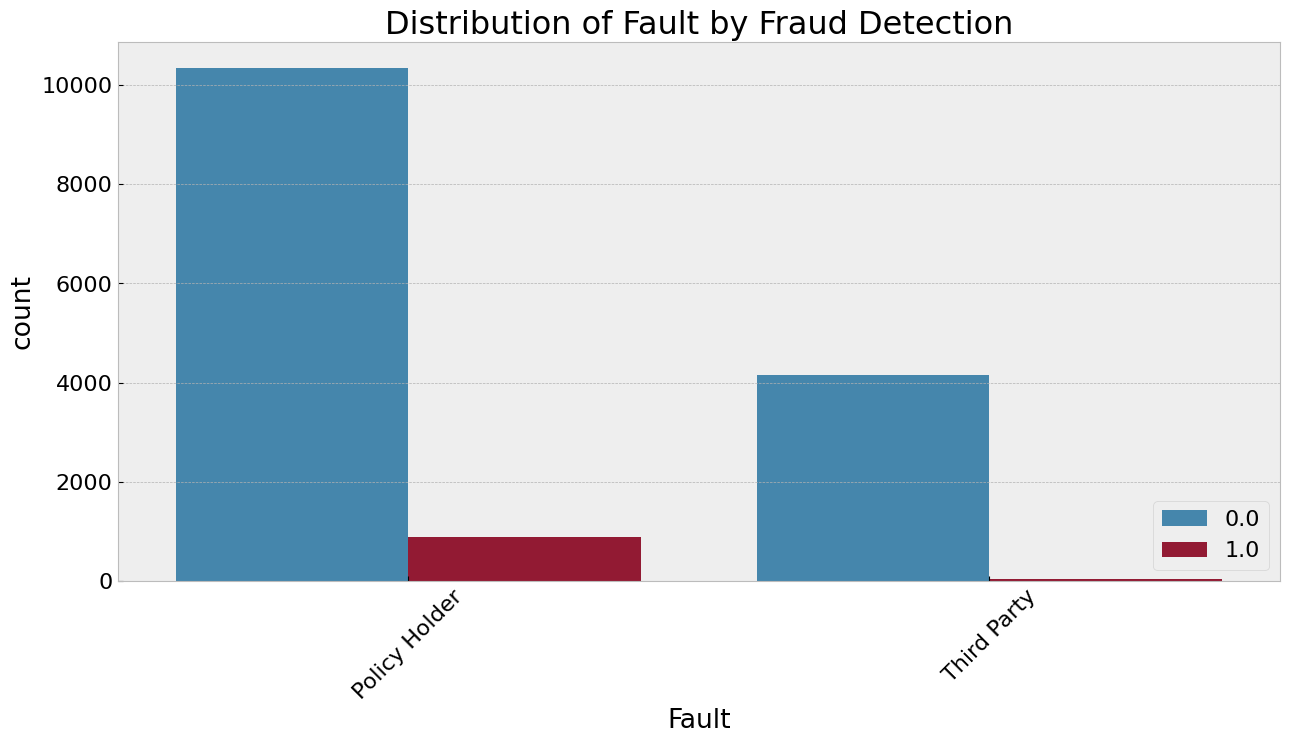

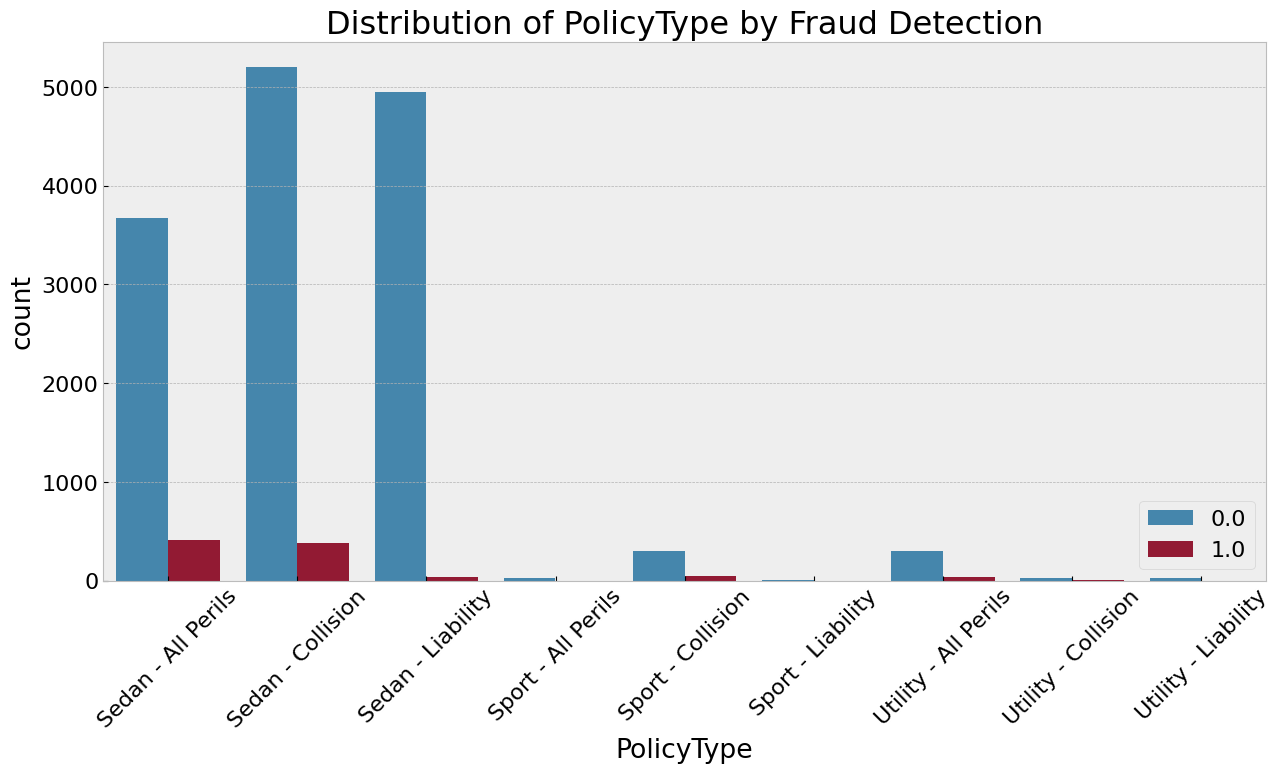

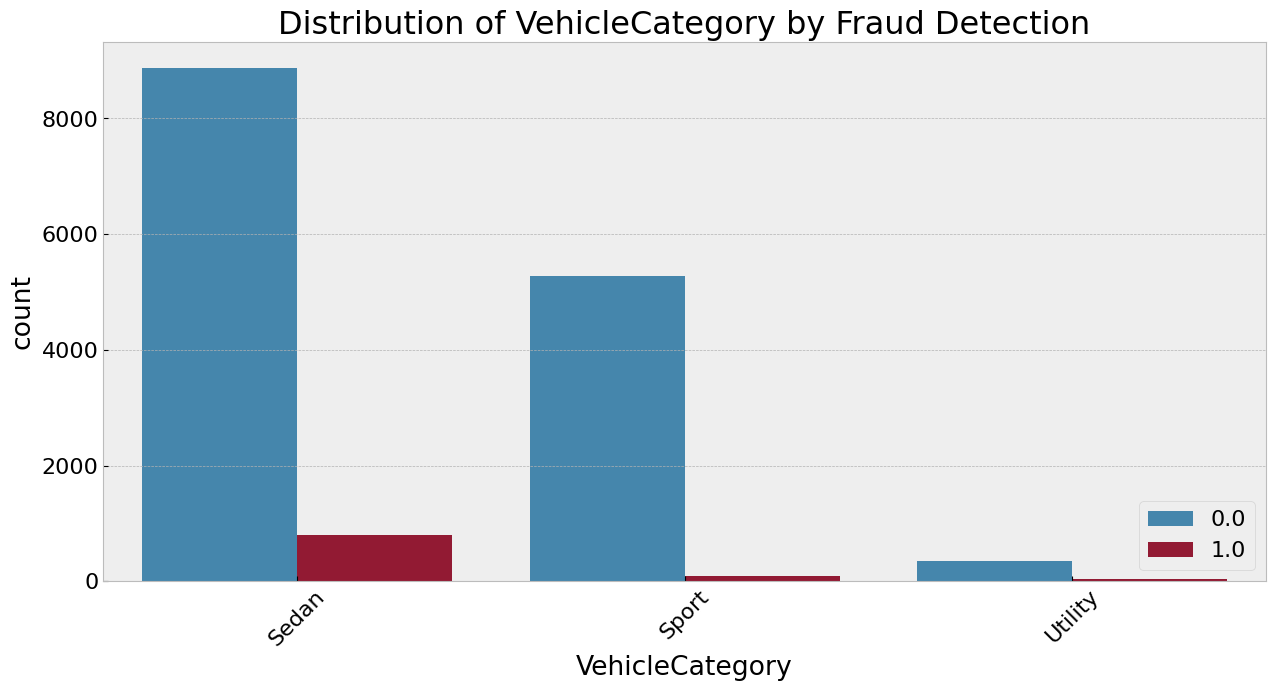

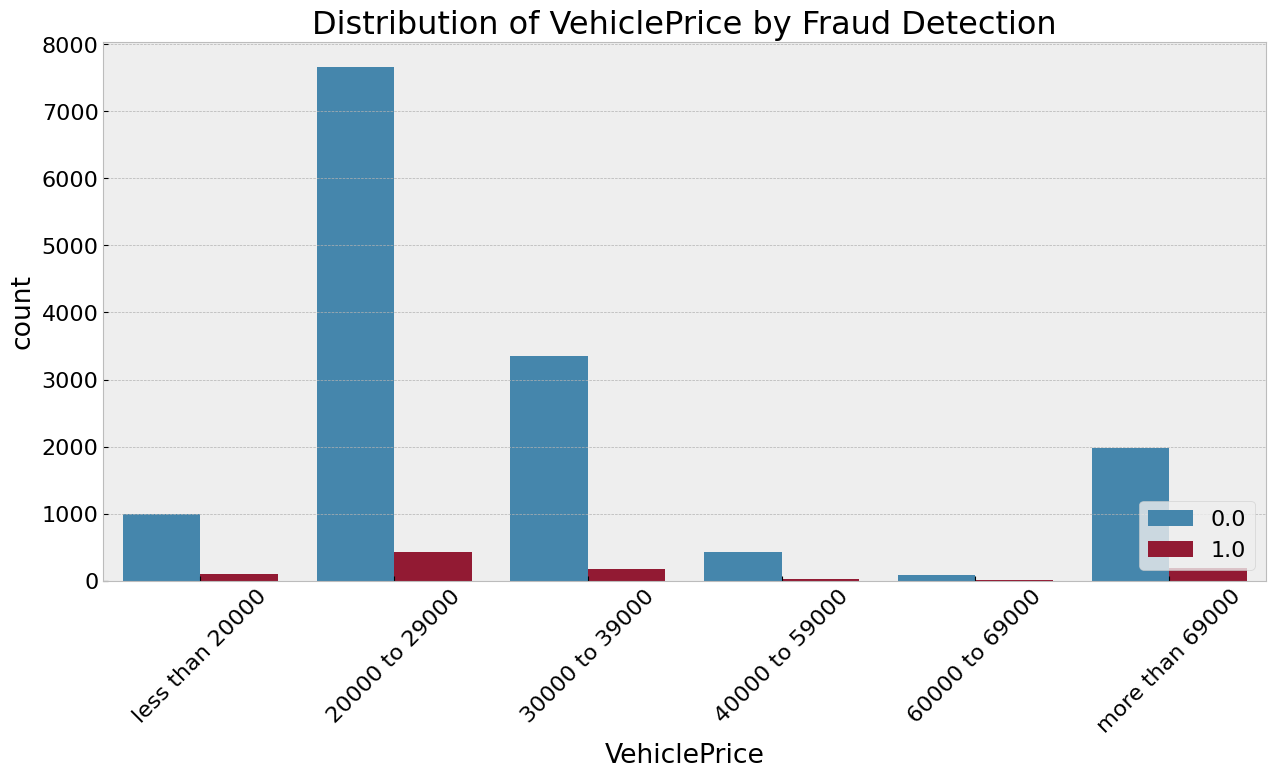

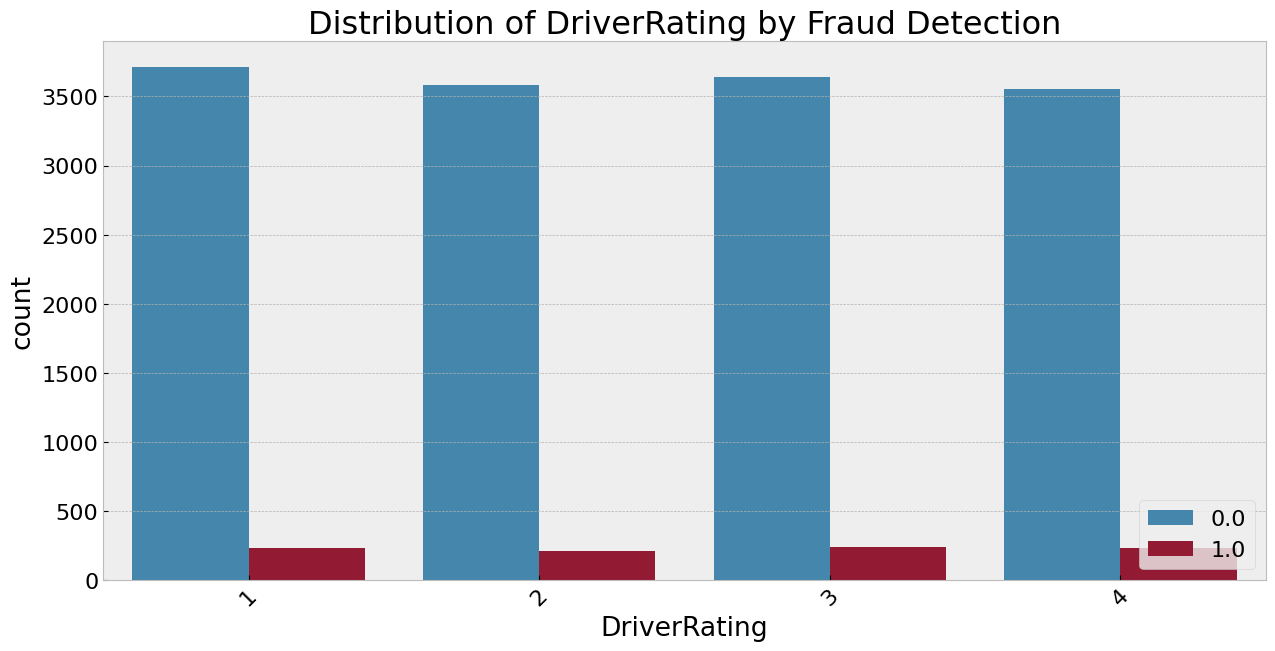

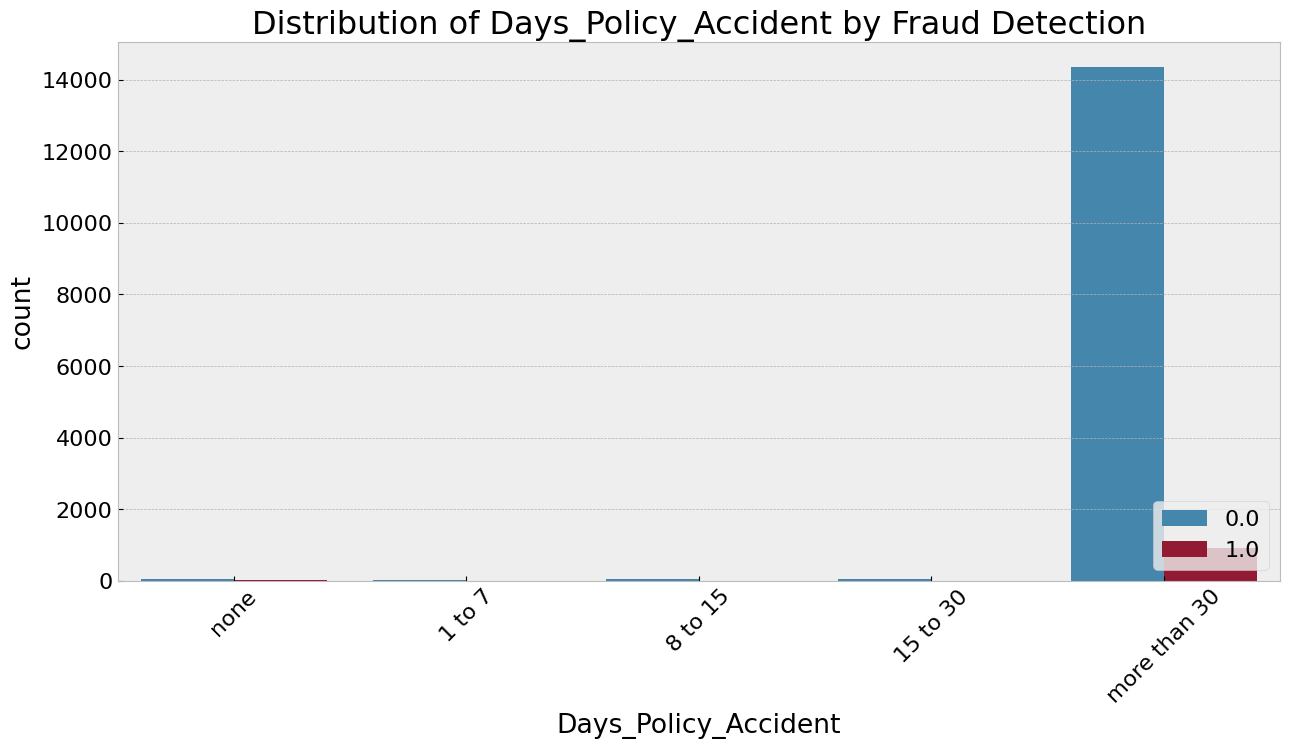

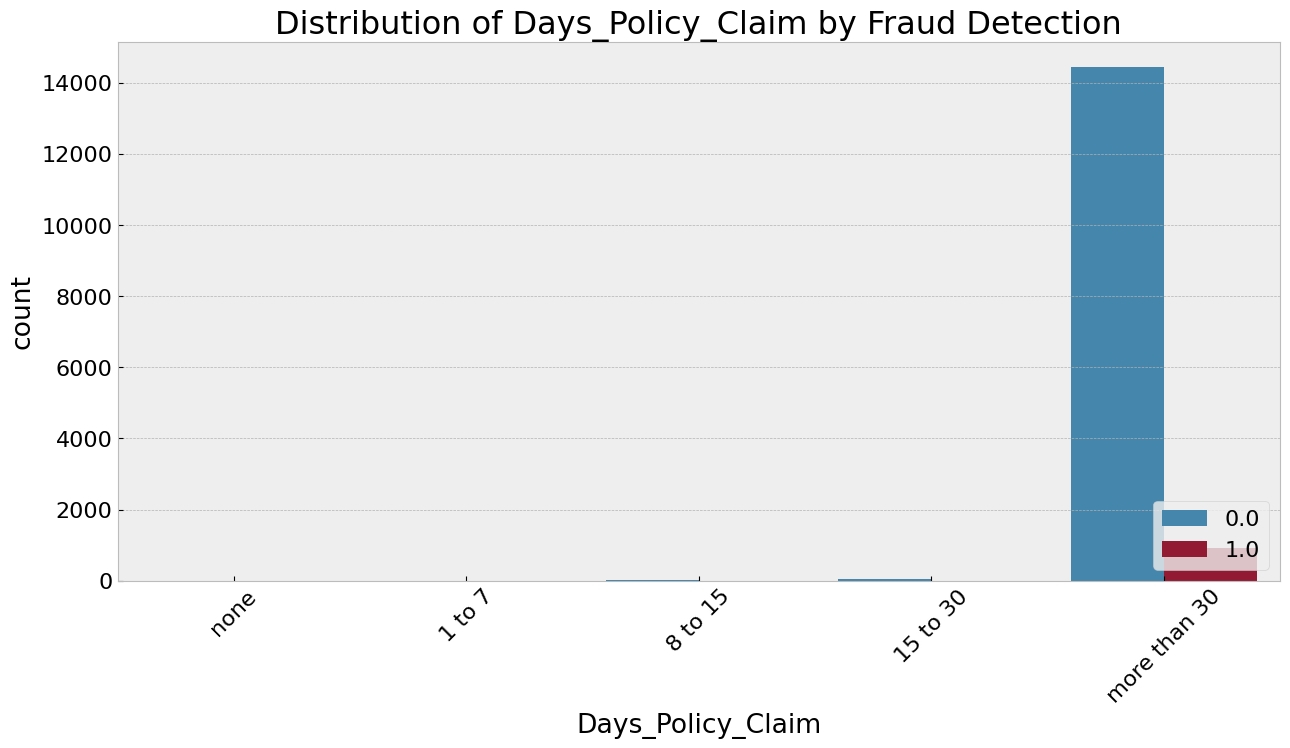

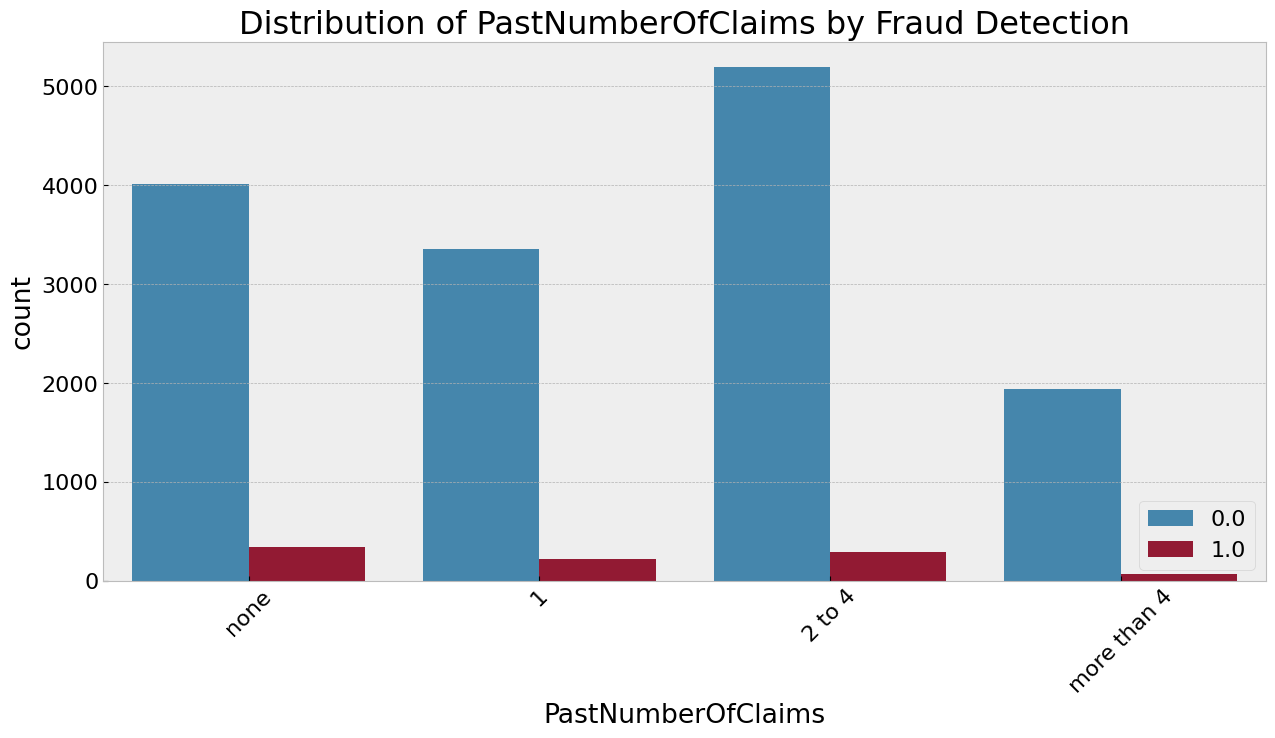

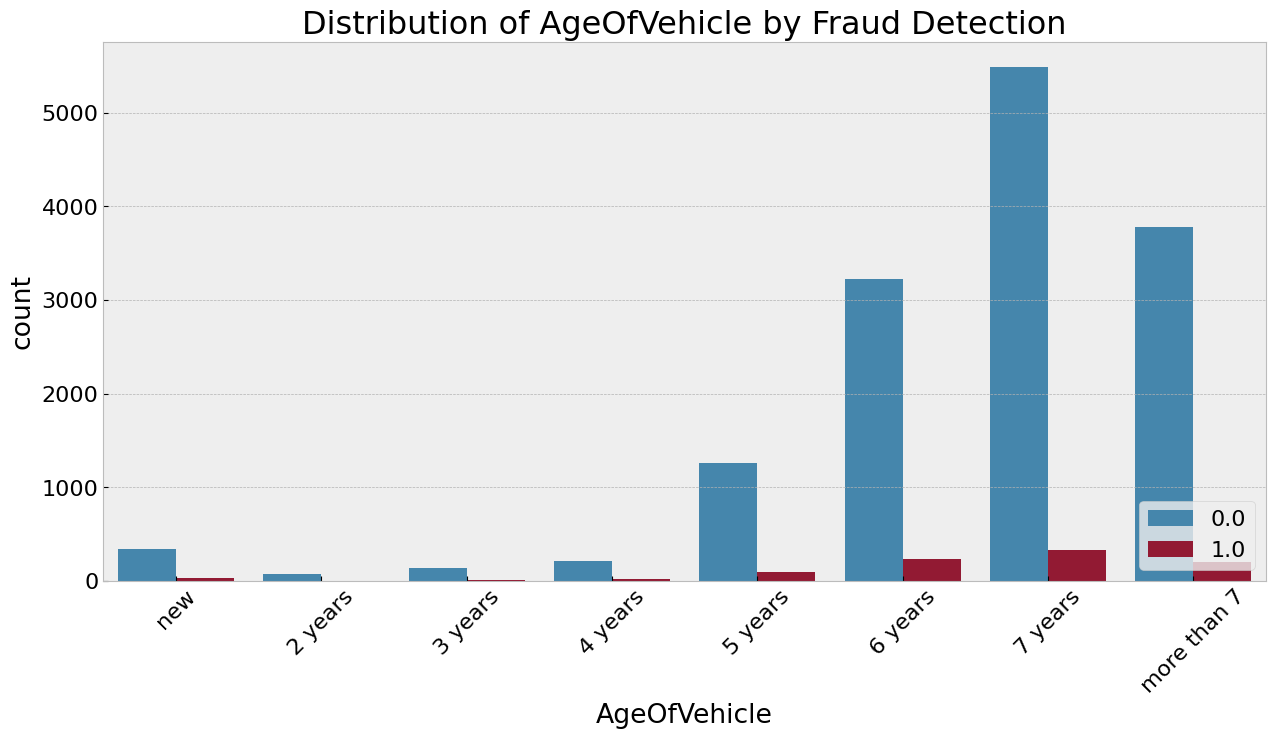

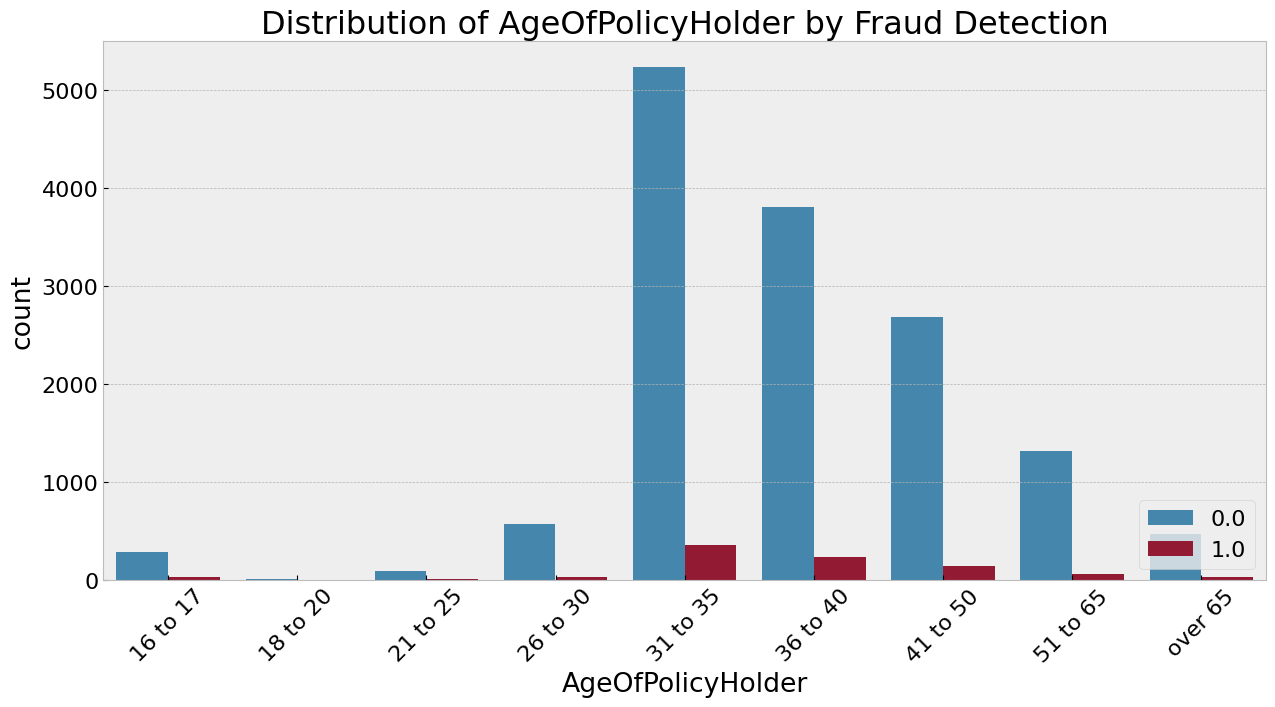

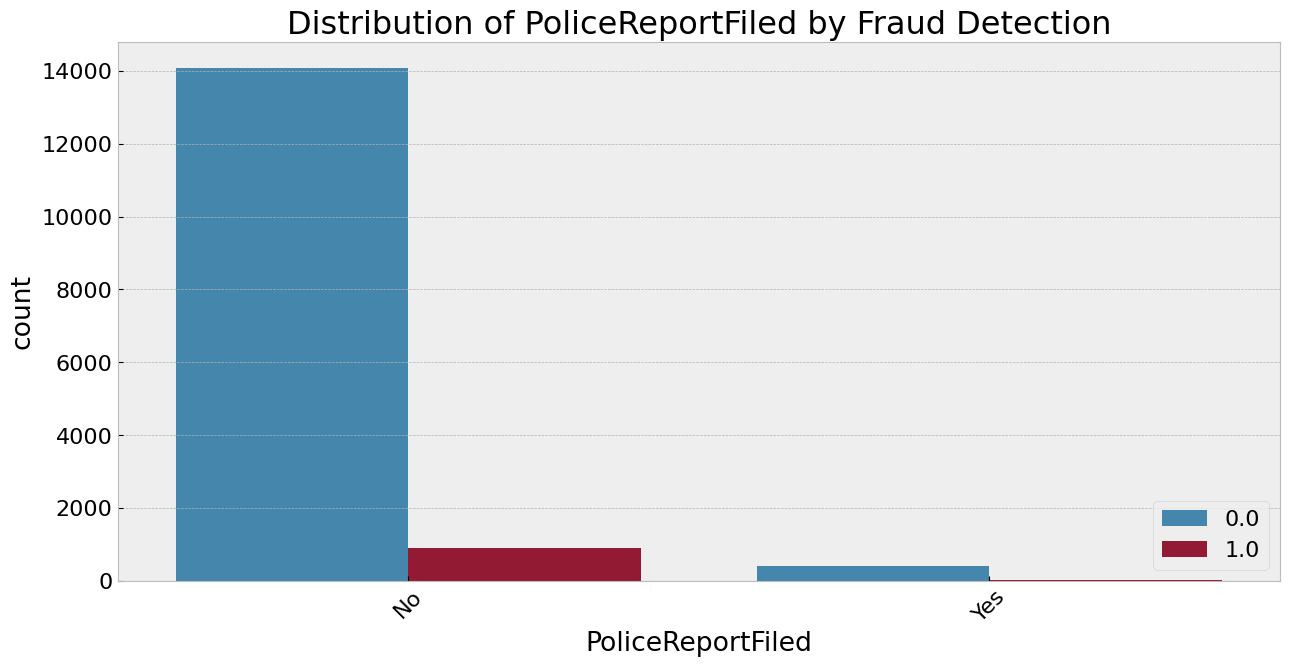

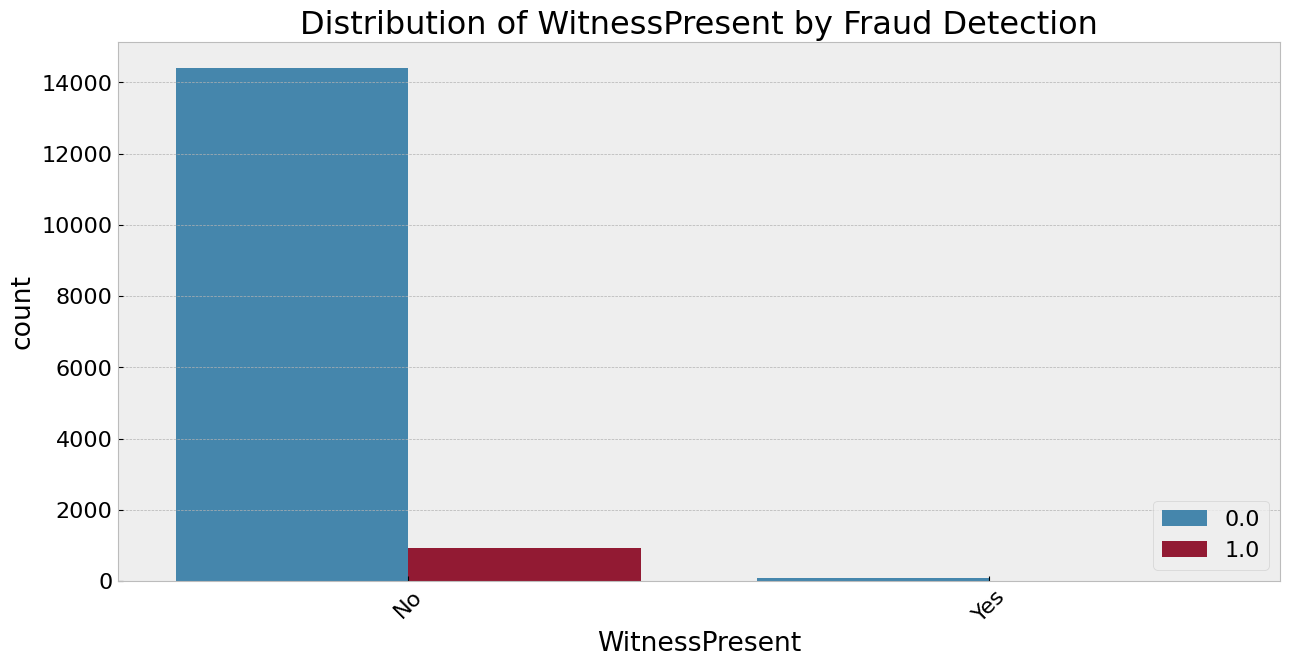

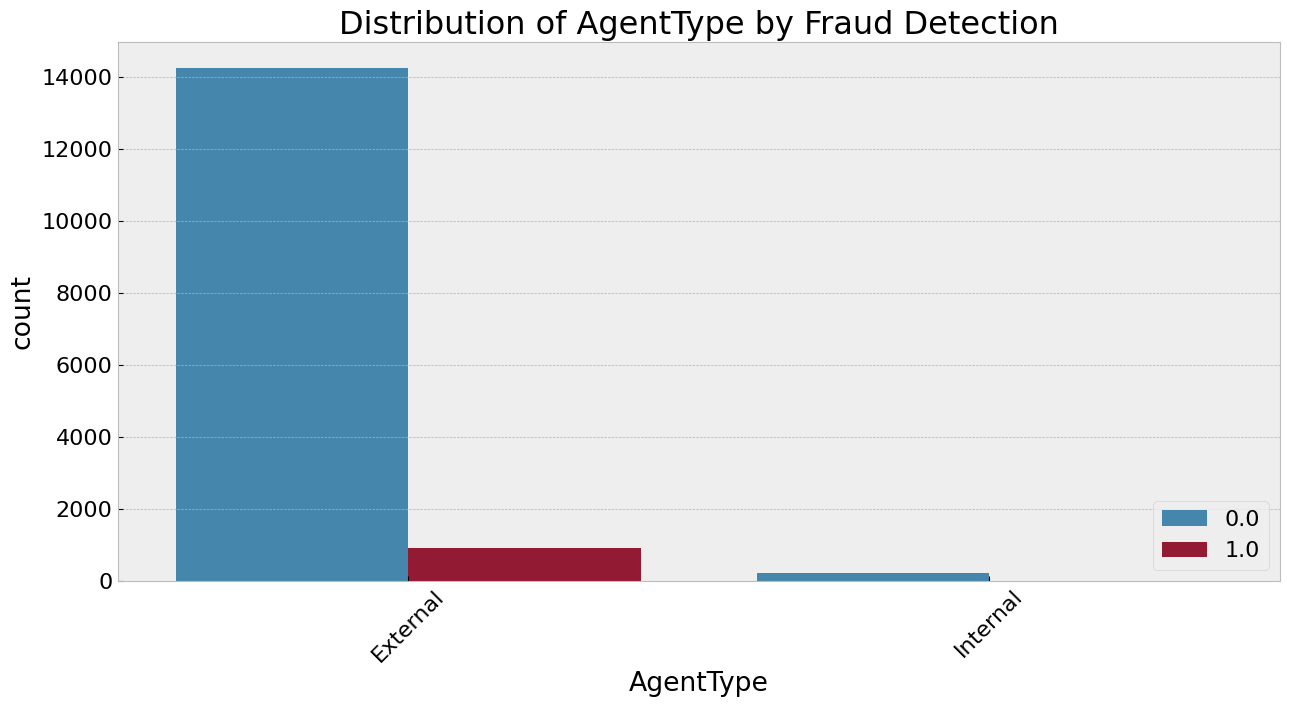

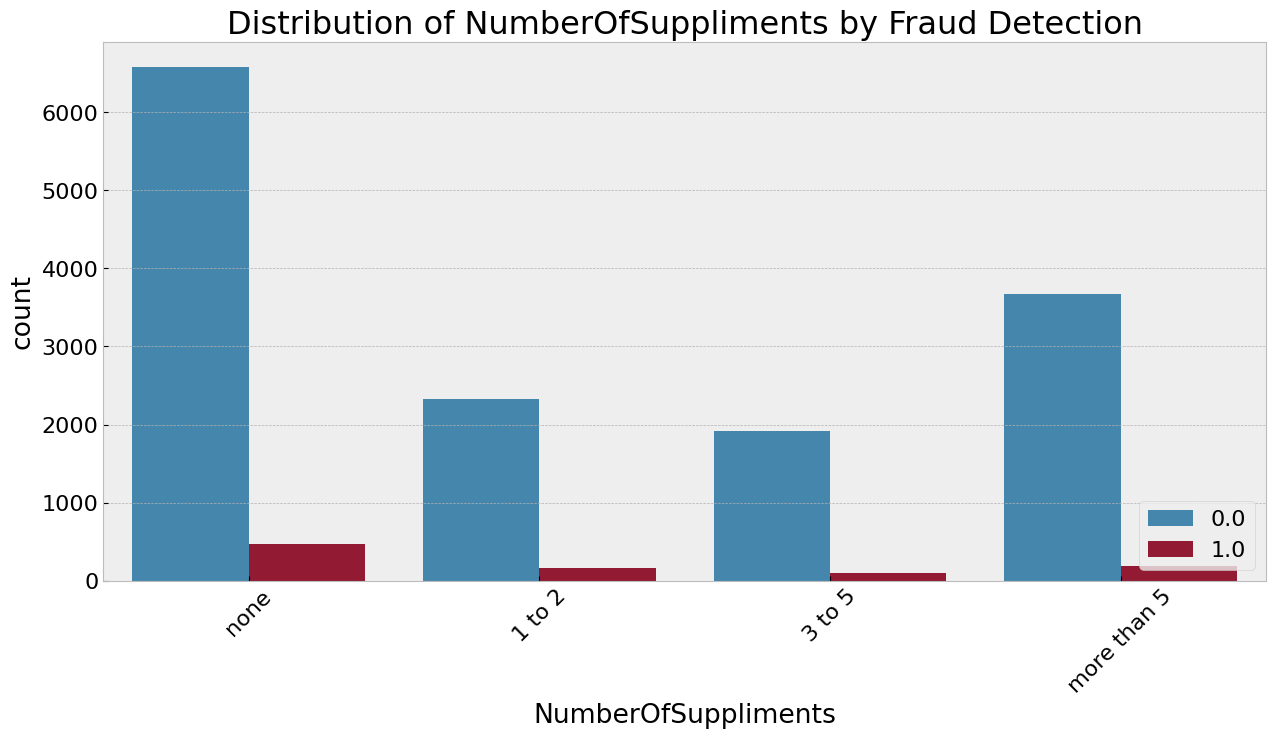

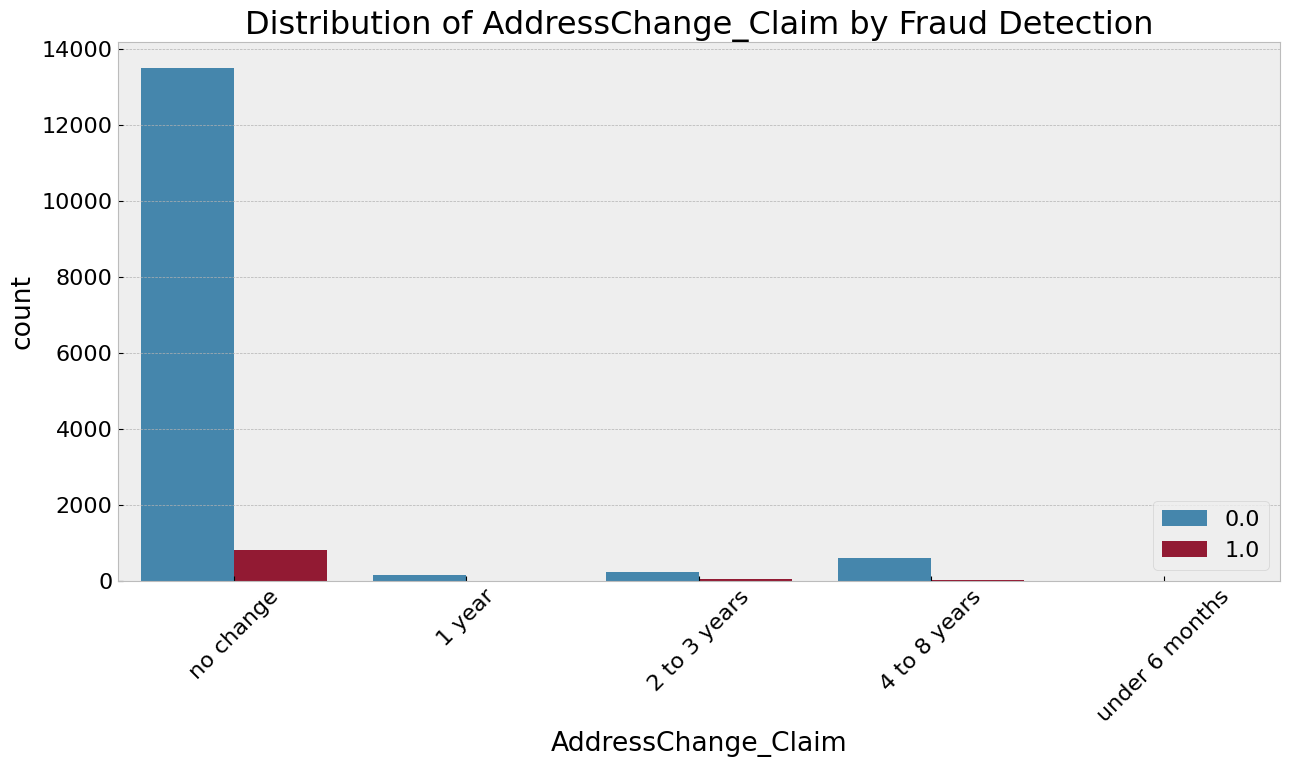

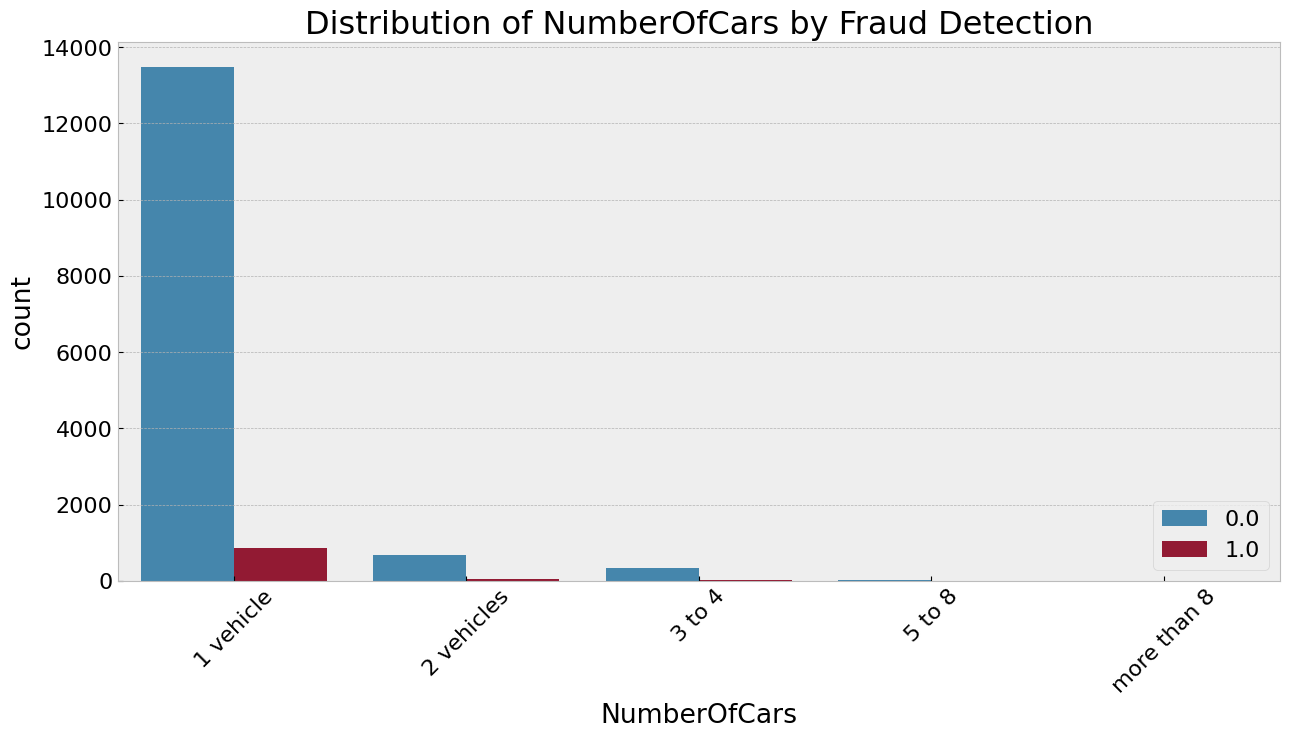

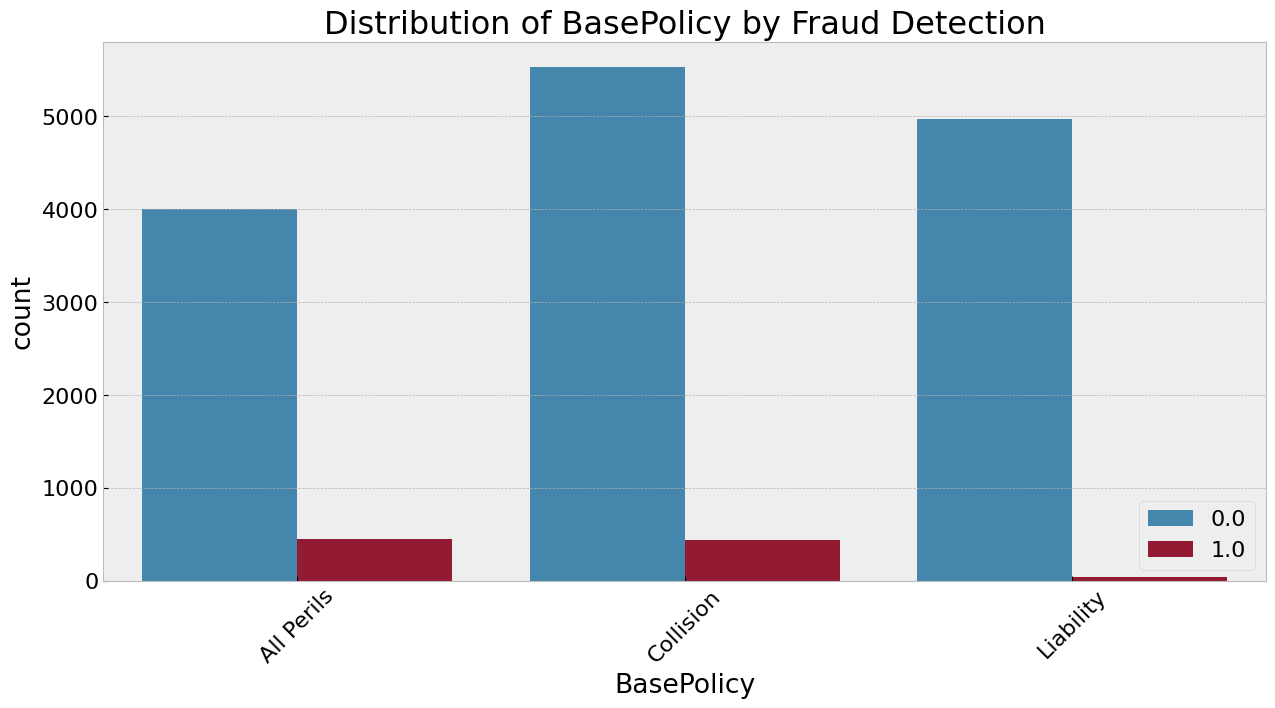

In [21]:
#Let's define right order od categorical data to make them easier to analyse:
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=ordered_months, ordered=True)
df['MonthClaimed'] = pd.Categorical(df['MonthClaimed'], categories=ordered_months, ordered=True)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=ordered_days, ordered=True)
df['DayOfWeekClaimed'] = pd.Categorical(df['DayOfWeekClaimed'], categories=ordered_days, ordered=True)

ordered_NumberOfCars = ['1 vehicle', '2 vehicles', '3 to 4', '5 to 8', 'more than 8']
df['NumberOfCars'] = pd.Categorical(df['NumberOfCars'], categories=ordered_NumberOfCars, ordered=True)

#set right order of binsed data:
ordered_NumberOfSuppliments = ['none', '1 to 2', '3 to 5', 'more than 5']
df['NumberOfSuppliments'] = pd.Categorical(df['NumberOfSuppliments'], categories=ordered_NumberOfSuppliments, ordered=True)

ordered_Days_Policy = ['none', '1 to 7', '8 to 15', '15 to 30', 'more than 30']
df['Days_Policy_Accident'] = pd.Categorical(df['Days_Policy_Accident'], categories=ordered_Days_Policy, ordered=True)
df['Days_Policy_Claim'] = pd.Categorical(df['Days_Policy_Claim'], categories=ordered_Days_Policy, ordered=True)

ordered_AgeOfPolicyHolder = ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over 65']
df['AgeOfPolicyHolder'] = pd.Categorical(df['AgeOfPolicyHolder'], categories=ordered_AgeOfPolicyHolder, ordered=True)

ordered_AgeOfVehicle = ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7']
df['AgeOfVehicle'] = pd.Categorical(df['AgeOfVehicle'], categories=ordered_AgeOfVehicle, ordered=True)

ordered_PastNumberOfClaims = ['none', '1', '2 to 4', 'more than 4']
df['PastNumberOfClaims'] = pd.Categorical(df['PastNumberOfClaims'], categories=ordered_PastNumberOfClaims, ordered=True)

ordered_VehiclePrice = ['less than 20000', '20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 'more than 69000']
df['VehiclePrice'] = pd.Categorical(df['VehiclePrice'], categories=ordered_VehiclePrice, ordered=True)

ordered_AddressChange_Claim = ['no change', '1 year', '2 to 3 years', '4 to 8 years', 'under 6 months']
df['AddressChange_Claim'] = pd.Categorical(df['AddressChange_Claim'], categories=ordered_AddressChange_Claim, ordered=True)

#initialise function for sorting by hue:
list_of_cols = ['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'BasePolicy']
def sort_by_hue(col):
    order = df.groupby(col)['FraudFound_P'].sum().sort_values(ascending=False).index
    df[col] = pd.Categorical(df[col], categories=order, ordered=True)

#sort by hue:
[sort_by_hue(col) for col in list_of_cols]
 
#Let's make sobe plots to explore data:
for col in cat_col:
    plt.figure(figsize=(15, 7))
    sns.countplot(data = df, x = col, hue = 'FraudFound_P')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col} by Fraud Detection', loc='center')
    plt.legend(loc='lower right')
    plt.show()

### Notes:
- the highest amouny of frauds were detected dring March, January anf May. In opposite the lowest amount of frauds were detected in December, July and November,
- Monday and Friday are the most fraudalent days,
- Pontiac, Toyota, Honda and Mazda are the most fraudalent brands, but because of high difference of popularity, it is neccesssary to analyse it deeper,
- most of detected fraud happend in urban area,
- most of frauda are claimed during the working days,
- MonthClaimed is highy correlated with Month,
- fraudsters are rather men than women,
- in the most od fraud claims, there was a foult of policy holder,
- PolicyType
- the most frauds were claimed on sedan vahicles,
- the most fraudalents cars are priced between 20000 to 29000. There is also high probability od fraud in group of car priced more than 69000,
- driver rating looks like unsignificant column,
- in general, frauds occured more than 30 days after policy starts,
- frauds are rather claimed more then 30 days after policy starts, which is highly correlated with Days_Policy_Accident,
- the most detected frauds were claimed by people without any claims in the past,
- the mosts fraudalent age is 7 years old, but in general cars older than 5 years are fraudalent. The lowest risk of frauds relate to relatively young cars (less than 4 years old),
- fraudsters are rather older than 30 yeasrs old, and in general age between 31 to 35 years is the group of the highest risk of fraud (relete to policy holders),
- frauds are rather not reported by police,
- frauds occured rather in place withoud witnesses,
- in general, frauds are claimed by policy, sold by external agents,
- NumberOfSuppliments
- in mosts of fraudsters, adress change was never noticed,
- most of fraudsters have only one car,
- the most fraudalent policies are "All Perils", and "Collision",
### Insight:
- PolicyType column based on BasePolicy and VehicleCategory. PolicyType is redundant column.

In [22]:
#Let's check in which months are the most fraudalent:
tmp = pd.pivot_table(data=df, index='Month', columns='FraudFound_P', aggfunc='size', fill_value=0)
tmp['percentage'] = tmp[1]/tmp[0]*100
tmp = tmp.sort_values('percentage' , ascending=False)
tmp = tmp.reset_index()
tmp.T

0      1      2      3      4      5      6      7      8   \
FraudFound_P                                                                  
 Month          Mar    Aug    May    Feb    Apr    Jan    Sep    Jun    Oct   
0.0000         1258   1043   1273   1184   1200   1324   1164   1241   1235   
1.0000          102     84     94     82     80     87     76     80     70   
 percentage  8.1081 8.0537 7.3841 6.9257 6.6667 6.5710 6.5292 6.4464 5.6680   

                 9      10     11  
FraudFound_P                       
 Month          Dec    Jul    Nov  
0.0000         1223   1196   1155  
1.0000           62     60     46  
 percentage  5.0695 5.0167 3.9827

### Notes:
- March, August, May are month with the highest propability od accuring fraud,
- December, July and November are months with the lowest propability od accuring frauds,

In [23]:
#Let's check in which days of week are the most fraudalent:
tmp = pd.pivot_table(data=df, index='DayOfWeek', columns='FraudFound_P', aggfunc='size', fill_value=0)
tmp['percentage'] = tmp[1]/tmp[0]*100
tmp = tmp.sort_values('percentage' , ascending=False)
tmp = tmp.reset_index()
tmp.T

0         1       2       3         4          5        6
FraudFound_P                                                                
 DayOfWeek    Sunday  Saturday  Friday  Monday  Thursday  Wednesday  Tuesday
0.0000          1623      1850    2291    2455      2053       2044     2180
1.0000           122       132     154     160       120        115      120
 percentage   7.5169    7.1351  6.7220  6.5173    5.8451     5.6262   5.5046

### Notes:
- during the weekend days (Sunday, Saturday), there is the highest percentage od detected frauds,

In [24]:
#Let's check in which accident area are the most fraudalent:
tmp = pd.pivot_table(data=df, index='AccidentArea', columns='FraudFound_P', aggfunc='size', fill_value=0)
tmp['percentage'] = tmp[1]/tmp[0]*100
tmp = tmp.sort_values('percentage' , ascending=False)
tmp = tmp.reset_index()
tmp.T

0      1
FraudFound_P               
 AccidentArea  Rural  Urban
0.0000          1464  13032
1.0000           133    790
 percentage   9.0847 6.0620

### Notes:
- despite the accidents in rural area happen rarely than ind urban are, the percentage od detected frauds is higher,

In [25]:
#Let's check in which marital status are the most fraudalent:
tmp = pd.pivot_table(data=df, index='MaritalStatus', columns='FraudFound_P', aggfunc='size', fill_value=0)
tmp['percentage'] = tmp[1]/tmp[0]*100
tmp = tmp.sort_values('percentage' , ascending=False)
tmp = tmp.reset_index()
tmp.T

0        1       2         3
FraudFound_P                                    
 MaritalStatus  Widow  Married  Single  Divorced
0.0000             32     9986    4405        73
1.0000              3      639     278         3
 percentage    9.3750   6.3990  6.3110    4.1096

### Notes:
- the most fraudalent marital group are Widows, but this group is rare,

In [26]:
#MAKE - first, let's fix some typos
corrections = {'Mecedes': 'Mercedes', 'Accura': 'Acura', 'Nisson': 'Nissan', 'Porche': 'Porsche'}

df['Make'] = df['Make'].replace(corrections)

In [27]:
#Let's check in which car brand are the most fraudalent:
tmp = pd.pivot_table(data=df, index='Make', columns='FraudFound_P', aggfunc='size', fill_value=0)
tmp['percentage'] = tmp[1]/tmp[0]*100
tmp = tmp.sort_values('percentage' , ascending=False)
tmp = tmp.reset_index()
tmp

FraudFound_P       Make  0.0000  1.0000   percentage
0              Mercedes       3       1      33.3333
1                 Acura     413      59      14.2857
2                Saturn      52       6      11.5385
3                  Saab      97      11      11.3402
4                  Ford     417      33       7.9137
5               Mercury      77       6       7.7922
6                   BMW      14       1       7.1429
7                 Honda    2621     179       6.8295
8                Toyota    2935     186       6.3373
9             Chevrolet    1587      94       5.9231
10              Pontiac    3624     213       5.8775
11                Mazda    2231     123       5.5132
12               Nissan      29       1       3.4483
13                   VW     275       8       2.9091
14                Dodge     107       2       1.8692
15                Lexus       1       0       0.0000
16              Porsche       5       0       0.0000
17               Jaguar       6       0       0.0000
18              Ferrari       2       0       0.0000

### Notes:
- there most popular car brands are: Pontiac, Toyota, Honda and Mazda,
- Mercedes, BMW, Jaguar, Lexus, Ferrari and Porche (group of premium cars) are rare labes,

Text(0.5, 1.0, 'Percentage od detected frauds by car producent')

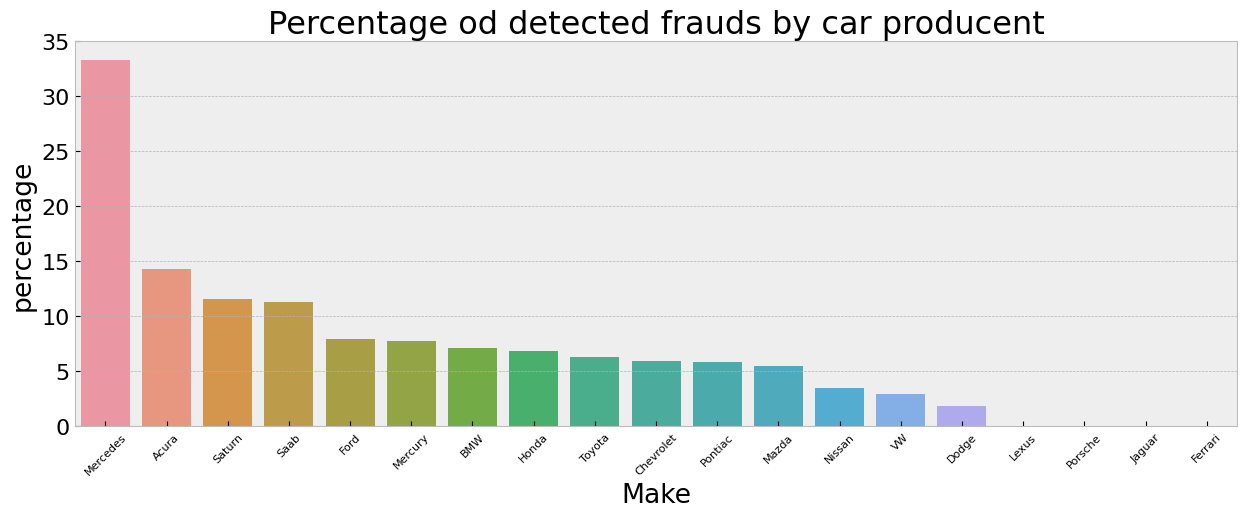

In [28]:
#and make visualisation on barplot:
plt.figure(figsize=(15,5))
sns.barplot(data=tmp, x='Make', y='percentage', order=tmp['Make'])
plt.xticks(rotation=45, fontsize=8)
plt.title('Percentage od detected frauds by car producent')

### Notes:
- the most fraudalent car brand is Mercedes, but there is only 4 record with this brand in out dataset (poor representation),
- Acura, Saturn and Saab are in group of high risk od fraud. Fraud occured in more than 10% claims with this cars,
- Jaguar, Lexus, Ferrari and Porsche are not so fraudalent,
### Insights:
- maybe binning categories is solution to reduce cardinality

In [29]:
#Lets check relation between age od policy holders ang age of cars:
tmp = pd.pivot_table(data=df, index='AgeOfPolicyHolder', columns='AgeOfVehicle', aggfunc='size', fill_value=0)
tmp

AgeOfVehicle       new  2 years  3 years  4 years  5 years  6 years  7 years  \
AgeOfPolicyHolder                                                              
16 to 17           317        0        1        0        0        0        0   
18 to 20             0        6        6        2        1        0        0   
21 to 25             0       34       42       22       10        0        0   
26 to 30             2       15       48       79      404       65        0   
31 to 35            30       11       33       97      743     2706     1973   
36 to 40             8        6       17       23      130      424     2680   
41 to 50             7        1        3        5       52      169      839   
51 to 65             6        0        2        1       13       65      239   
over 65              2        0        0        0        4       19       76   

AgeOfVehicle       more than 7  
AgeOfPolicyHolder               
16 to 17                     1  
18 to 20                     0  
21 to 25                     0  
26 to 30                     0  
31 to 35                     0  
36 to 40                   755  
41 to 50                  1752  
51 to 65                  1066  
over 65                    407

In [30]:
#Lets check relation between age od policy holders and detection of frauds:
tmp = pd.pivot_table(data=df, index='AgeOfPolicyHolder', columns='FraudFound_P', aggfunc='size', fill_value=0)
tmp

FraudFound_P       0.0000  1.0000
AgeOfPolicyHolder                
16 to 17              288      31
18 to 20               13       2
21 to 25               92      16
26 to 30              580      33
31 to 35             5233     360
36 to 40             3806     237
41 to 50             2684     144
51 to 65             1322      70
over 65               478      30

In [31]:
tmp = pd.pivot_table(data=df, index='AgeOfPolicyHolder', columns='FraudFound_P', aggfunc='size', fill_value=0)
tmp['percentage'] = tmp[1]/tmp[0]*100
tmp = tmp.sort_values('percentage' , ascending=False)
tmp = tmp.reset_index()
tmp

FraudFound_P  AgeOfPolicyHolder  0.0000  1.0000   percentage
0                      21 to 25      92      16      17.3913
1                      18 to 20      13       2      15.3846
2                      16 to 17     288      31      10.7639
3                      31 to 35    5233     360       6.8794
4                       over 65     478      30       6.2762
5                      36 to 40    3806     237       6.2270
6                      26 to 30     580      33       5.6897
7                      41 to 50    2684     144       5.3651
8                      51 to 65    1322      70       5.2950

### Numerical Data:

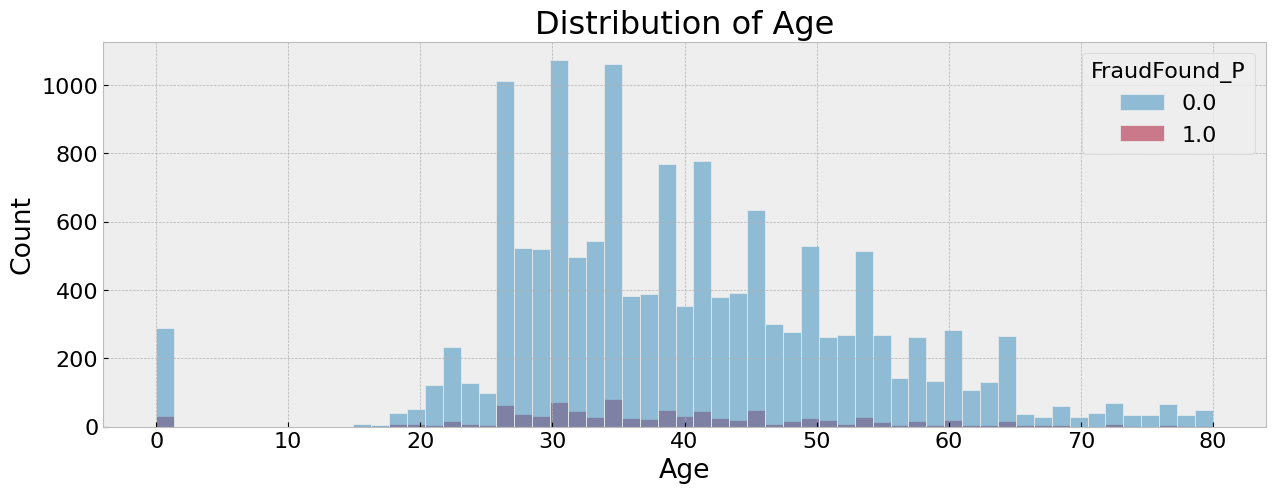

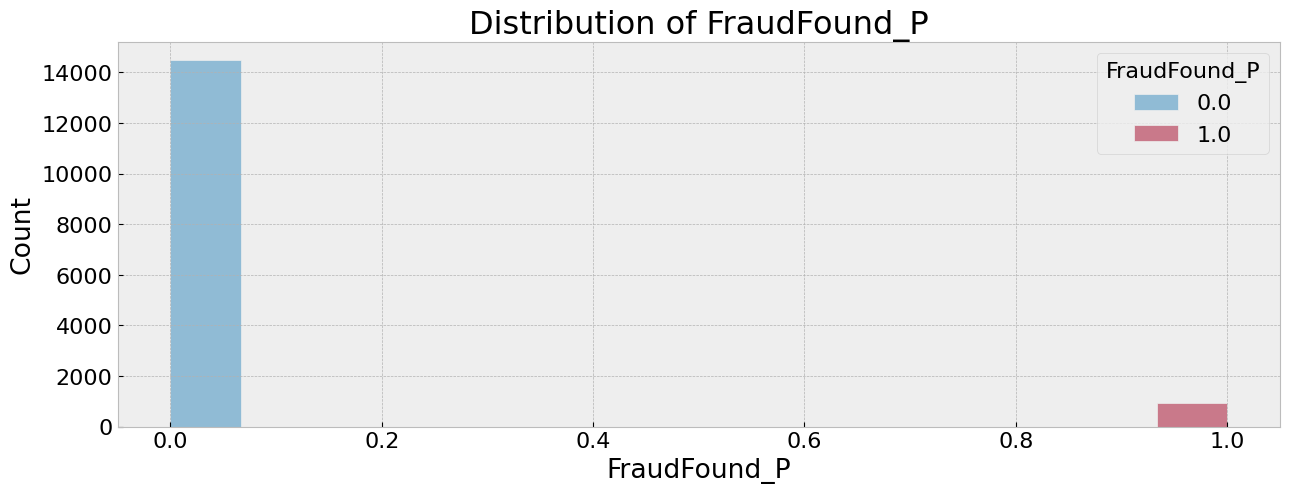

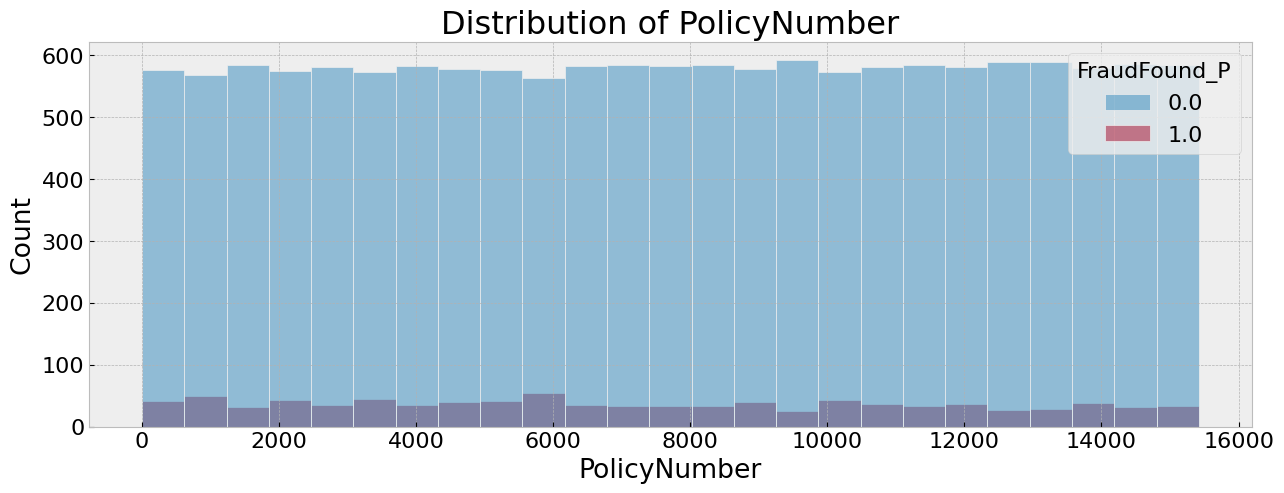

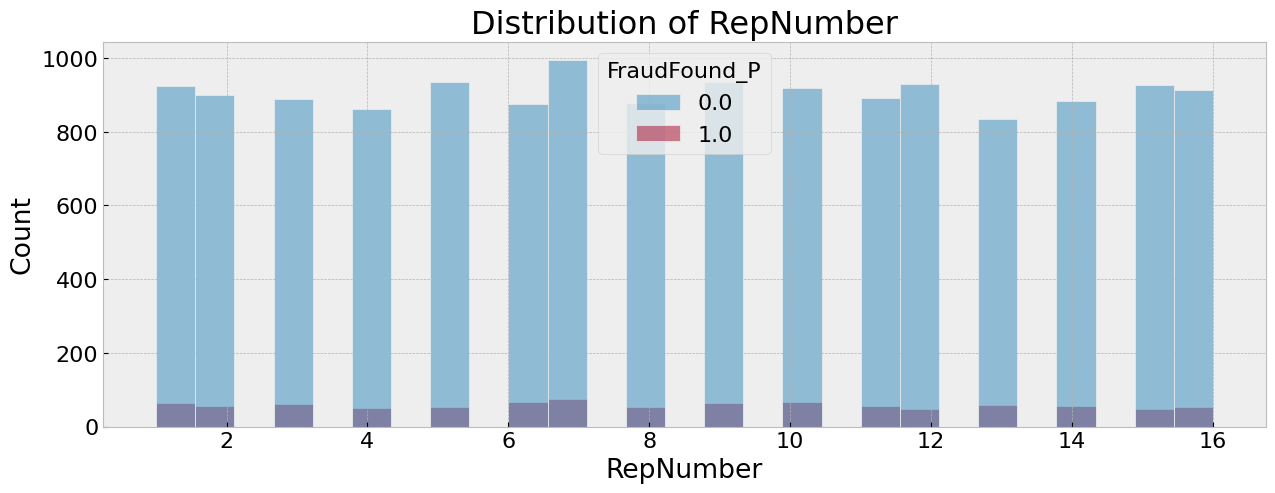

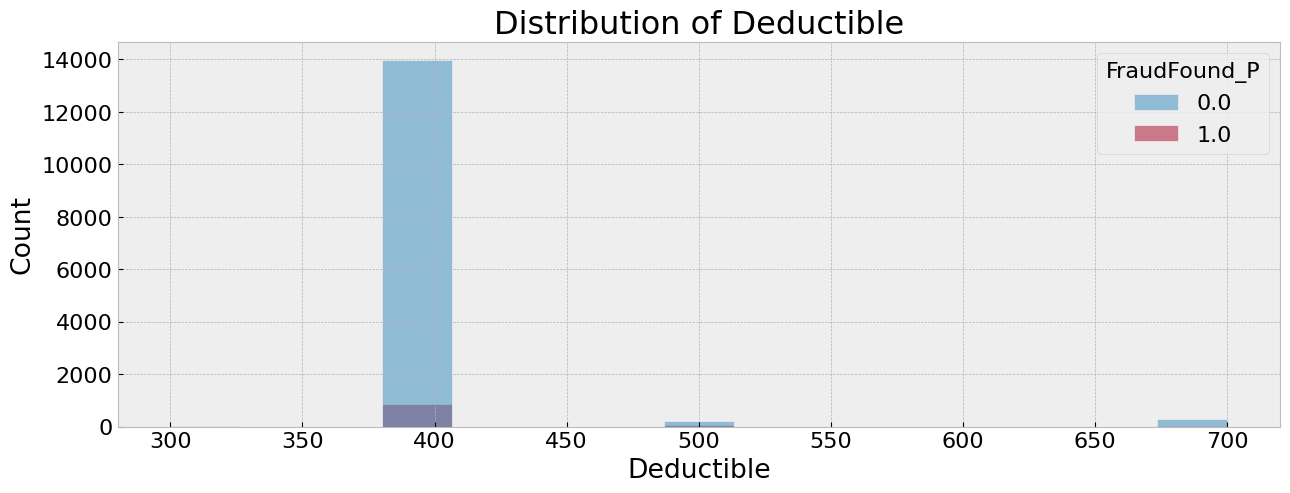

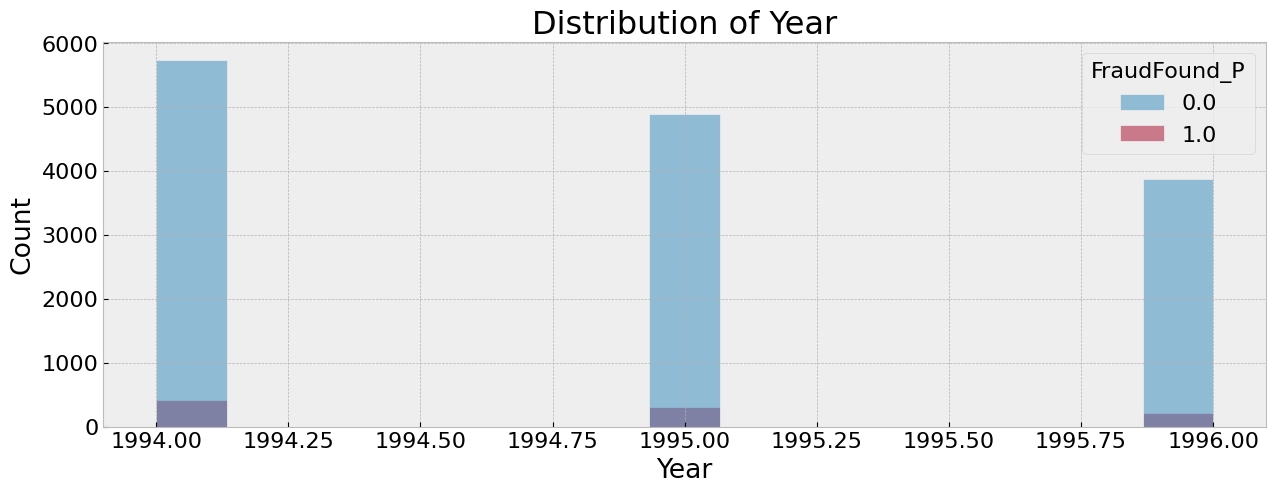

In [32]:
# Lets do some visualisation of numerical data:
for col in num_col:
    plt.figure(figsize=(15, 5))
    sns.histplot(data=df, x=col, hue ='FraudFound_P')
    plt.title(f'Distribution of {col}')

### Notes:
 - fraudsters are mostly in age between 25 to 65 years old,
 - distributiono of Age is right skeved,
 - surprisingly we have some observations with age equal 0, it is necessary to check correlation of 0 with detected frauds,
 - distribution od policy number looks useless,
 - RepNumber - I don't know what exactly this column is,
 - deductible equal 400 is the most frequent group,
 - occurence of detected frauds year by year, from 1994 to 1966, decreased diametrically,
 - Deductible, Year and RepNumber are descrete variables,

In [33]:
#Let's check if there is correlation between Age=0, and detected frauds:
tmp = df[df['Age']==0]
tmp_table = pd.pivot_table(data=tmp, index='Age', columns='FraudFound_P', aggfunc='size', fill_value=0)
tmp_table

FraudFound_P  0.0000  1.0000
Age                         
0.0000           288      31

### Notes:
 - Age equal 0 - it looks very important for future predictions, a lot of fraud was detected for this Age,
 - it will be clever to make new column with indicator for Age equal 0,

In [34]:
#Check correlation between RepNumber and FraudFound_P:
tmp = pd.pivot_table(data=df, index='RepNumber', columns='FraudFound_P', aggfunc='size', fill_value=0)
tmp['percentage'] = tmp[1] / tmp[0]  * 100
tmp.T

RepNumber     1.0000   2.0000   3.0000   4.0000   5.0000   6.0000   7.0000   \
FraudFound_P                                                                  
0.0000       924.0000 901.0000 889.0000 862.0000 935.0000 876.0000 995.0000   
1.0000        63.0000  55.0000  60.0000  50.0000  52.0000  66.0000  74.0000   
 percentage    6.8182   6.1043   6.7492   5.8005   5.5615   7.5342   7.4372   

RepNumber     8.0000   9.0000   10.0000  11.0000  12.0000  13.0000  14.0000  \
FraudFound_P                                                                  
0.0000       879.0000 934.0000 920.0000 892.0000 930.0000 834.0000 884.0000   
1.0000        52.0000  65.0000  66.0000  56.0000  47.0000  58.0000  57.0000   
 percentage    5.9158   6.9593   7.1739   6.2780   5.0538   6.9544   6.4480   

RepNumber     15.0000  16.0000  
FraudFound_P                    
0.0000       927.0000 914.0000  
1.0000        49.0000  53.0000  
 percentage    5.2859   5.7987

<Axes: title={'center': 'Fraud detected by RepNumber'}, xlabel='RepNumber'>

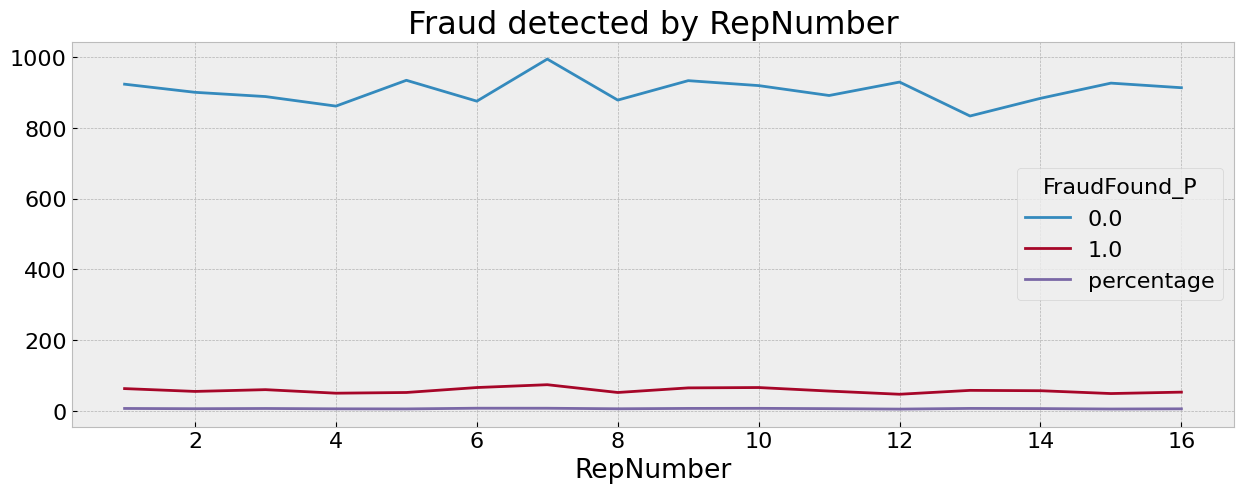

In [35]:
tmp.plot(kind='line', figsize=(15,5), title='Fraud detected by RepNumber')

### Notes:
 - it looks like unsignificant feature,

In [36]:
#RepNumber, Deductible, Year in real are categorical columnns, so it's necessary tu make an update of num_col and cat_col:
df[['RepNumber', 'Deductible', 'Year']] = df[['RepNumber', 'Deductible', 'Year']].astype('object')
df[['RepNumber', 'Deductible', 'Year']] = df[['RepNumber', 'Deductible', 'Year']].astype('category')

tmp_col = ['RepNumber', 'Deductible', 'Year']

for col in tmp_col:
    num_col.remove(col)
    cat_col.append(col)

print(f'num_col:\t {num_col}')
print(f'cat_col:\t {cat_col}')

num_col:	 ['Age', 'FraudFound_P', 'PolicyNumber']
cat_col:	 ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy', 'RepNumber', 'Deductible', 'Year']


In [37]:
#initialise a function to detect rare labels in categorical data:
def analyse_rare_labels(df, col, rare_perc):
    df = df.copy()
    tmp = df.groupby(col)['FraudFound_P'].count()/len(df)
    return print(f'{tmp} \n')

#detect rare labels (occurance less than 5%): 
for col in cat_col:
    analyse_rare_labels(df, col, 0.05)

Month
Jan   0.0915
Feb   0.0821
Mar   0.0882
Apr   0.0830
May   0.0887
Jun   0.0857
Jul   0.0815
Aug   0.0731
Sep   0.0804
Oct   0.0846
Nov   0.0779
Dec   0.0833
Name: FraudFound_P, dtype: float64 

WeekOfMonth
1   0.2067
2   0.2307
3   0.2361
4   0.2204
5   0.1062
Name: FraudFound_P, dtype: float64 

DayOfWeek
Monday      0.1696
Tuesday     0.1492
Wednesday   0.1400
Thursday    0.1409
Friday      0.1586
Saturday    0.1285
Sunday      0.1132
Name: FraudFound_P, dtype: float64 

Make
Acura       0.0306
BMW         0.0010
Chevrolet   0.1090
Dodge       0.0071
Ferrari     0.0001
Ford        0.0292
Honda       0.1816
Jaguar      0.0004
Lexus       0.0001
Mazda       0.1527
Mercedes    0.0003
Mercury     0.0054
Nissan      0.0019
Pontiac     0.2488
Porsche     0.0003
Saab        0.0070
Saturn      0.0038
Toyota      0.2024
VW          0.0184
Name: FraudFound_P, dtype: float64 

AccidentArea
Rural   0.1036
Urban   0.8964
Name: FraudFound_P, dtype: float64 

DayOfWeekClaimed
Monday      0.243

### Notes:
 - there is a lot of rare labels (less occurance than 5%),
 - to avoid influence of noise, rare labels should be grouped, and replaced with another value, e.g. "other"

# Feature engineering

In [38]:
# First, let's drop reduntant columns:
df = df.drop(['Year', 'RepNumber', 'PolicyType', 'PolicyNumber'], axis = 1)

In [39]:
#Lets make some bins to decreace cardinality and rare labels:

MAKE_MAPPING = { 'Mercedes': 'high_risk_group', 'Acura': 'high_risk_group', 'Saturn': 'high_risk_group', 'Saab': 'high_risk_group',
                  'Ford': 'medium_risk_group', 'Mercury': 'medium_risk_group', 'BMW': 'medium_risk_group', 'Honda': 'medium_risk_group', 
                  'Toyota': 'medium_risk_group', 'Chevrolet': 'medium_risk_group', 'Pontiac': 'medium_risk_group', 'Mazda': 'medium_risk_group',
                  'Nissan': 'low_risk_group', 'VW': 'low_risk_group', 'Dodge': 'low_risk_group', 'Jaguar': 'low_risk_group', 'Lexus': 'low_risk_group',
                  'Ferrari': 'low_risk_group', 'Porsche' : 'low_risk_group' }

df['Make'] = df['Make'].map(MAKE_MAPPING)

In [40]:
df['Make'].value_counts()

Make
medium_risk_group    14341
high_risk_group        642
low_risk_group         436
Name: count, dtype: int64

In [41]:
#Let's check again Make representation:
tmp = pd.pivot_table(data=df, index='Make', columns='FraudFound_P', aggfunc='size', fill_value=0)
tmp['percentage'] = tmp[1]/tmp[0]*100
tmp = tmp.sort_values('percentage' , ascending=False)
tmp = tmp.reset_index()
tmp

FraudFound_P               Make  0.0000  1.0000   percentage
0               high_risk_group     565      77      13.6283
1             medium_risk_group   13506     835       6.1824
2                low_risk_group     425      11       2.5882

Text(0.5, 1.0, 'Percentage od detected frauds by group of risk')

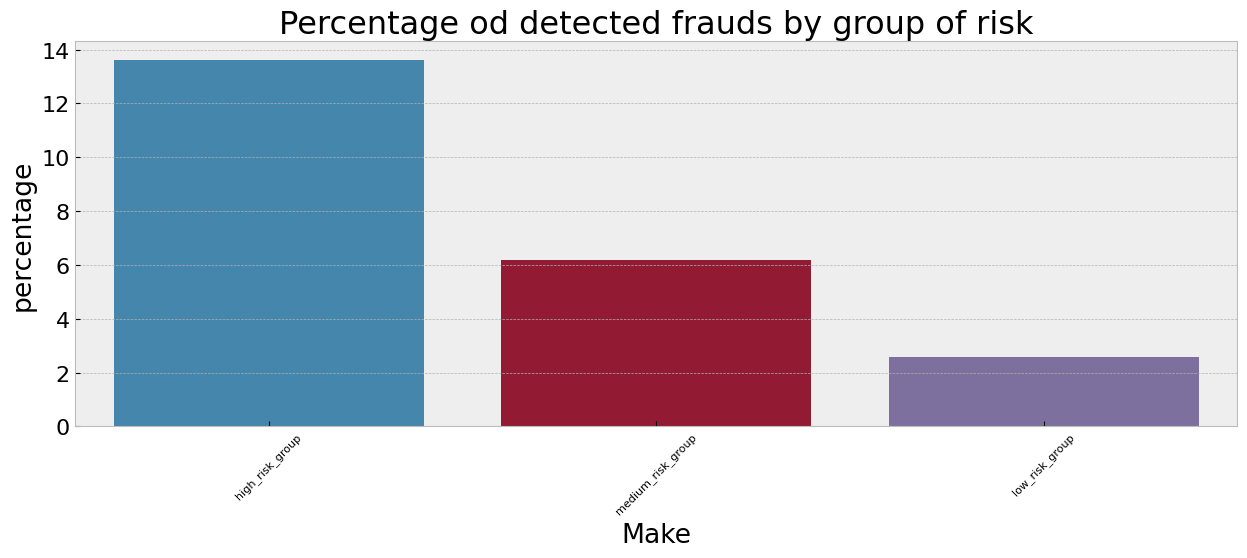

In [42]:
#and make visualisation on barplot:
plt.figure(figsize=(15,5))
sns.barplot(data=tmp, x='Make', y='percentage', order=tmp['Make'])
plt.xticks(rotation=45, fontsize=8)
plt.title('Percentage od detected frauds by group of risk')

#### After this trasnformation, values from Make column are binned in 3 bins:
- high_risk_group - with the highest propability of fraud, incude: Mercedes, Acura, Saturn, 'Saab'.
- medium_risk_group - with the medium propability of fraud, incude: Ford, Mercury, BMW, Honda, Toyota, Chevrolet, Pontiac , Mazda.
- low_risk_group - with the low propability of fraud, incude: Nissan, VW, Dodge, Jaguar, Lexus, Ferrari, Porsche.

In [43]:
#Make a new feature: indicator if Age equal 0:
df['Age_is_0'] = np.nan
df.loc[df['Age'] == 0, 'Age_is_0'] = 1
df.loc[df['Age'] != 0, 'Age_is_0'] = 0

In [44]:
df['Age_is_0'].value_counts()

Age_is_0
0.0000    15100
1.0000      319
Name: count, dtype: int64

In [45]:
tmp = pd.pivot_table(data=df, index='Age_is_0', columns='FraudFound_P', aggfunc='size', fill_value=0)
tmp['percentage'] = tmp[1]/tmp[0]*100
tmp = tmp.sort_values('percentage' , ascending=False)
tmp = tmp.reset_index()
tmp

FraudFound_P   Age_is_0  0.0000  1.0000   percentage
0                1.0000     288      31      10.7639
1                0.0000   14208     892       6.2782

### Notes:
- Age equal 0 - this new parameter is so informative!

In [46]:
# drop 'Age_is_0' to initialise it during preparing pipeline:
df = df.drop('Age_is_0', axis = 1)

Text(0.5, 1.0, 'Age after log transformation')

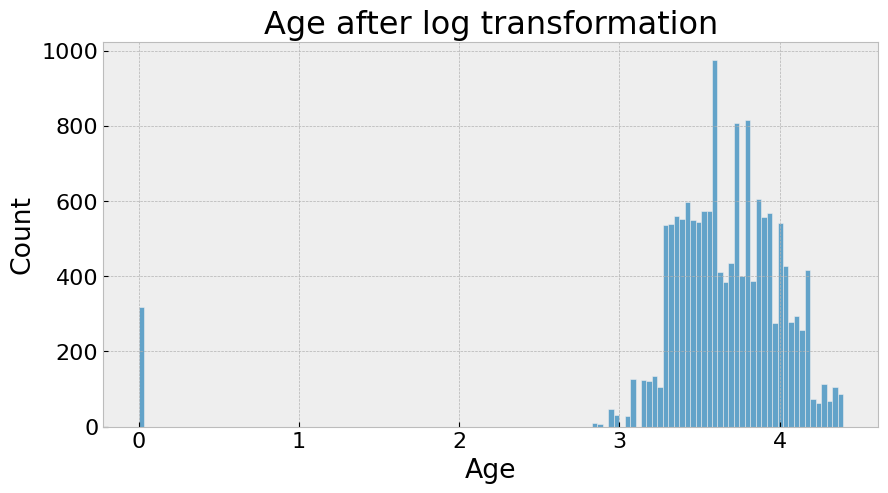

In [47]:
#Plot log transformation results:
plt.figure(figsize = (10, 5))
sns.histplot(np.log(1 + df['Age']))
plt.title('Age after log transformation')

### Notes:
- log transformation make distribution more gaussian,
- let's add new columns with "is zero" indicator,

In [48]:
#Apply log transformation  on Age column:
df['Age'] = np.log(1 + data['Age'])

## Separate target from dataset:

In [49]:
# #separate target from dataset:
target = df.pop('FraudFound_P')
target.value_counts()

FraudFound_P
0.0000    14496
1.0000      923
Name: count, dtype: int64

### Notes:
 - target is highly inbalanced


In [50]:
#split data for train and test sets:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42, stratify=target)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_trian shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (12335, 28)
X_test shape: (3084, 28)
y_trian shape: (12335,)
y_test shape: (3084,)


In [51]:
y_test.value_counts()

FraudFound_P
0.0000    2899
1.0000     185
Name: count, dtype: int64

In [52]:
#exttract validation set from training set:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_trian shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (9251, 28)
X_test shape: (3084, 28)
y_trian shape: (9251,)
y_test shape: (3084,)


In [53]:
y_val.value_counts()

FraudFound_P
0.0000    2899
1.0000     185
Name: count, dtype: int64

In [54]:
print(f'num_col:\t {num_col}')
print(f'cat_col:\t {cat_col}')

num_col:	 ['Age', 'FraudFound_P', 'PolicyNumber']
cat_col:	 ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy', 'RepNumber', 'Deductible', 'Year']


In [55]:
#Config:
REDUNTANT_COLS = ['Year', 'RepNumber', 'PolicyType', 'PolicyNumber']

CATEGORICAL_COLS  = ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 
                      'MaritalStatus', 'Fault', 'VehicleCategory', 'VehiclePrice', 'DriverRating', 'Days_Policy_Accident', 
                      'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 
                      'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy', 'Deductible']

NUMERICAL_COLS = ['Age']

In [56]:
#apply transformers:
categorical_transformer = Pipeline(steps = [
        ('ohe', OneHotEncoder(categories = "auto", 
            drop = "first", 
            sparse_output = False,
            min_frequency = 0.05,
            handle_unknown = "infrequent_if_exist"))
        ]
                                   )


numerical_transformer = Pipeline(steps = [
    ('ss', StandardScaler()
     )]
                                 )


prep = ColumnTransformer(
    transformers = [('num', numerical_transformer, NUMERICAL_COLS),
                    ('cat', categorical_transformer, CATEGORICAL_COLS)],
    remainder = 'passthrough',
    n_jobs=4)

prep.set_output(transform="pandas")

ColumnTransformer(n_jobs=4, remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('ss', StandardScaler())]),
                                 ['Age']),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.05,
                                                                sparse_output=False))]),
                                 ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make',
                                  'AccidentArea', 'DayOfWeekClaimed',
                                  'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
                                  'MaritalStatus', 'Fault', 'VehicleCategory',
                                  'VehiclePrice', 'DriverRating',
                                  'Days_Policy_Accident', 'Days_Policy_Claim',
                                  'PastNumberOfClaims', 'AgeOfVehicle',
                                  'AgeOfPolicyHolder', 'PoliceReportFiled',
                                  'WitnessPresent', 'AgentType',
                                  'NumberOfSuppliments', 'AddressChange_Claim',
                                  'NumberOfCars', 'BasePolicy',
                                  'Deductible'])])

In [57]:
#fit preprocessor:
prep.fit(X_train)

ColumnTransformer(n_jobs=4, remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('ss', StandardScaler())]),
                                 ['Age']),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.05,
                                                                sparse_output=False))]),
                                 ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make',
                                  'AccidentArea', 'DayOfWeekClaimed',
                                  'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
                                  'MaritalStatus', 'Fault', 'VehicleCategory',
                                  'VehiclePrice', 'DriverRating',
                                  'Days_Policy_Accident', 'Days_Policy_Claim',
                                  'PastNumberOfClaims', 'AgeOfVehicle',
                                  'AgeOfPolicyHolder', 'PoliceReportFiled',
                                  'WitnessPresent', 'AgentType',
                                  'NumberOfSuppliments', 'AddressChange_Claim',
                                  'NumberOfCars', 'BasePolicy',
                                  'Deductible'])])

In [58]:
#apply preprocessing for validation subset
X_train_prep = prep.transform(X_train)

In [59]:
X_train_prep.head()

num__Age  cat__Month_Aug  cat__Month_Dec  cat__Month_Feb  \
8666    -0.5256          0.0000          0.0000          0.0000   
14490   -0.4649          0.0000          0.0000          0.0000   
2516     0.9420          0.0000          0.0000          0.0000   
2888     0.6930          0.0000          0.0000          0.0000   
4665    -0.7935          0.0000          1.0000          0.0000   

       cat__Month_Jan  cat__Month_Jul  cat__Month_Jun  cat__Month_Mar  \
8666           1.0000          0.0000          0.0000          0.0000   
14490          0.0000          0.0000          0.0000          0.0000   
2516           0.0000          0.0000          0.0000          0.0000   
2888           0.0000          0.0000          0.0000          0.0000   
4665           0.0000          0.0000          0.0000          0.0000   

       cat__Month_May  cat__Month_Nov  cat__Month_Oct  cat__Month_Sep  \
8666           0.0000          0.0000          0.0000          0.0000   
14490          0.0000          0.0000          0.0000          1.0000   
2516           1.0000          0.0000          0.0000          0.0000   
2888           0.0000          0.0000          0.0000          1.0000   
4665           0.0000          0.0000          0.0000          0.0000   

       cat__WeekOfMonth_2  cat__WeekOfMonth_3  cat__WeekOfMonth_4  ...  \
8666               0.0000              1.0000              0.0000  ...   
14490              1.0000              0.0000              0.0000  ...   
2516               0.0000              1.0000              0.0000  ...   
2888               0.0000              0.0000              1.0000  ...   
4665               0.0000              1.0000              0.0000  ...   

       cat__AgeOfPolicyHolder_36 to 40  cat__AgeOfPolicyHolder_41 to 50  \
8666                            0.0000                           0.0000   
14490                           0.0000                           0.0000   
2516                            0.0000                           0.0000   
2888                            0.0000                           1.0000   
4665                            0.0000                           0.0000   

       cat__AgeOfPolicyHolder_51 to 65  \
8666                            0.0000   
14490                           0.0000   
2516                            1.0000   
2888                            0.0000   
4665                            0.0000   

       cat__AgeOfPolicyHolder_infrequent_sklearn  \
8666                                      0.0000   
14490                                     0.0000   
2516                                      0.0000   
2888                                      0.0000   
4665                                      1.0000   

       cat__PoliceReportFiled_infrequent_sklearn  \
8666                                      0.0000   
14490                                     0.0000   
2516                                      0.0000   
2888                                      0.0000   
4665                                      1.0000   

       cat__WitnessPresent_infrequent_sklearn  \
8666                                   0.0000   
14490                                  0.0000   
2516                                   0.0000   
2888                                   0.0000   
4665                                   0.0000   

       cat__AgentType_infrequent_sklearn  cat__NumberOfSuppliments_3 to 5  \
8666                              0.0000                           0.0000   
14490                             0.0000                           0.0000   
2516                              0.0000                           1.0000   
2888                              0.0000                           0.0000   
4665                              0.0000                           0.0000   

       cat__NumberOfSuppliments_more than 5  cat__NumberOfSuppliments_none  \
8666                                 0.0000                         1.0000   
14490                                

In [60]:
X_train_prep.shape

(9251, 81)

### Notes:
 - after one hot encoding there is 81 columns to train,

In [61]:
#apply preprocessing for validation subset
X_val_prep = prep.transform(X_val)

In [62]:
#apply preprocessing for test subset
X_test_prep = prep.transform(X_test)

In [63]:
X_train_prep.head()

num__Age  cat__Month_Aug  cat__Month_Dec  cat__Month_Feb  \
8666    -0.5256          0.0000          0.0000          0.0000   
14490   -0.4649          0.0000          0.0000          0.0000   
2516     0.9420          0.0000          0.0000          0.0000   
2888     0.6930          0.0000          0.0000          0.0000   
4665    -0.7935          0.0000          1.0000          0.0000   

       cat__Month_Jan  cat__Month_Jul  cat__Month_Jun  cat__Month_Mar  \
8666           1.0000          0.0000          0.0000          0.0000   
14490          0.0000          0.0000          0.0000          0.0000   
2516           0.0000          0.0000          0.0000          0.0000   
2888           0.0000          0.0000          0.0000          0.0000   
4665           0.0000          0.0000          0.0000          0.0000   

       cat__Month_May  cat__Month_Nov  cat__Month_Oct  cat__Month_Sep  \
8666           0.0000          0.0000          0.0000          0.0000   
14490          0.0000          0.0000          0.0000          1.0000   
2516           1.0000          0.0000          0.0000          0.0000   
2888           0.0000          0.0000          0.0000          1.0000   
4665           0.0000          0.0000          0.0000          0.0000   

       cat__WeekOfMonth_2  cat__WeekOfMonth_3  cat__WeekOfMonth_4  ...  \
8666               0.0000              1.0000              0.0000  ...   
14490              1.0000              0.0000              0.0000  ...   
2516               0.0000              1.0000              0.0000  ...   
2888               0.0000              0.0000              1.0000  ...   
4665               0.0000              1.0000              0.0000  ...   

       cat__AgeOfPolicyHolder_36 to 40  cat__AgeOfPolicyHolder_41 to 50  \
8666                            0.0000                           0.0000   
14490                           0.0000                           0.0000   
2516                            0.0000                           0.0000   
2888                            0.0000                           1.0000   
4665                            0.0000                           0.0000   

       cat__AgeOfPolicyHolder_51 to 65  \
8666                            0.0000   
14490                           0.0000   
2516                            1.0000   
2888                            0.0000   
4665                            0.0000   

       cat__AgeOfPolicyHolder_infrequent_sklearn  \
8666                                      0.0000   
14490                                     0.0000   
2516                                      0.0000   
2888                                      0.0000   
4665                                      1.0000   

       cat__PoliceReportFiled_infrequent_sklearn  \
8666                                      0.0000   
14490                                     0.0000   
2516                                      0.0000   
2888                                      0.0000   
4665                                      1.0000   

       cat__WitnessPresent_infrequent_sklearn  \
8666                                   0.0000   
14490                                  0.0000   
2516                                   0.0000   
2888                                   0.0000   
4665                                   0.0000   

       cat__AgentType_infrequent_sklearn  cat__NumberOfSuppliments_3 to 5  \
8666                              0.0000                           0.0000   
14490                             0.0000                           0.0000   
2516                              0.0000                           1.0000   
2888                              0.0000                           0.0000   
4665                              0.0000                           0.0000   

       cat__NumberOfSuppliments_more than 5  cat__NumberOfSuppliments_none  \
8666                                 0.0000                         1.0000   
14490                                

# Select the most important features, using RFE:

In [68]:
# Base Model:
rf = RandomForestClassifier(random_state = 42, n_jobs = -1)

# set up crossvalidation:
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

#set up RFECV:
rfecv = RFECV(
    estimator = rf,
    step = 1,
    cv = cv,
    scoring = "roc_auc",
    n_jobs = -1
)

In [69]:
rfecv.fit(X_train_prep, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
      estimator=RandomForestClassifier(n_jobs=-1, random_state=42), n_jobs=-1,
      scoring='roc_auc')

In [70]:
# Optimal number od features:
rfecv.n_features_

79

In [71]:
#Make ranking of feature importancy:
rank = pd.DataFrame(data = {'feature_name': rfecv.feature_names_in_,
                            'rank': rfecv.ranking_})
rank.sort_values(by='rank', ascending=True, inplace=True)
rank.reset_index(drop=True, inplace=True)
rank.head()

feature_name  rank
0                              num__Age     1
1                   cat__DriverRating_4     1
2                   cat__DriverRating_3     1
3                   cat__DriverRating_2     1
4  cat__VehiclePrice_infrequent_sklearn     1

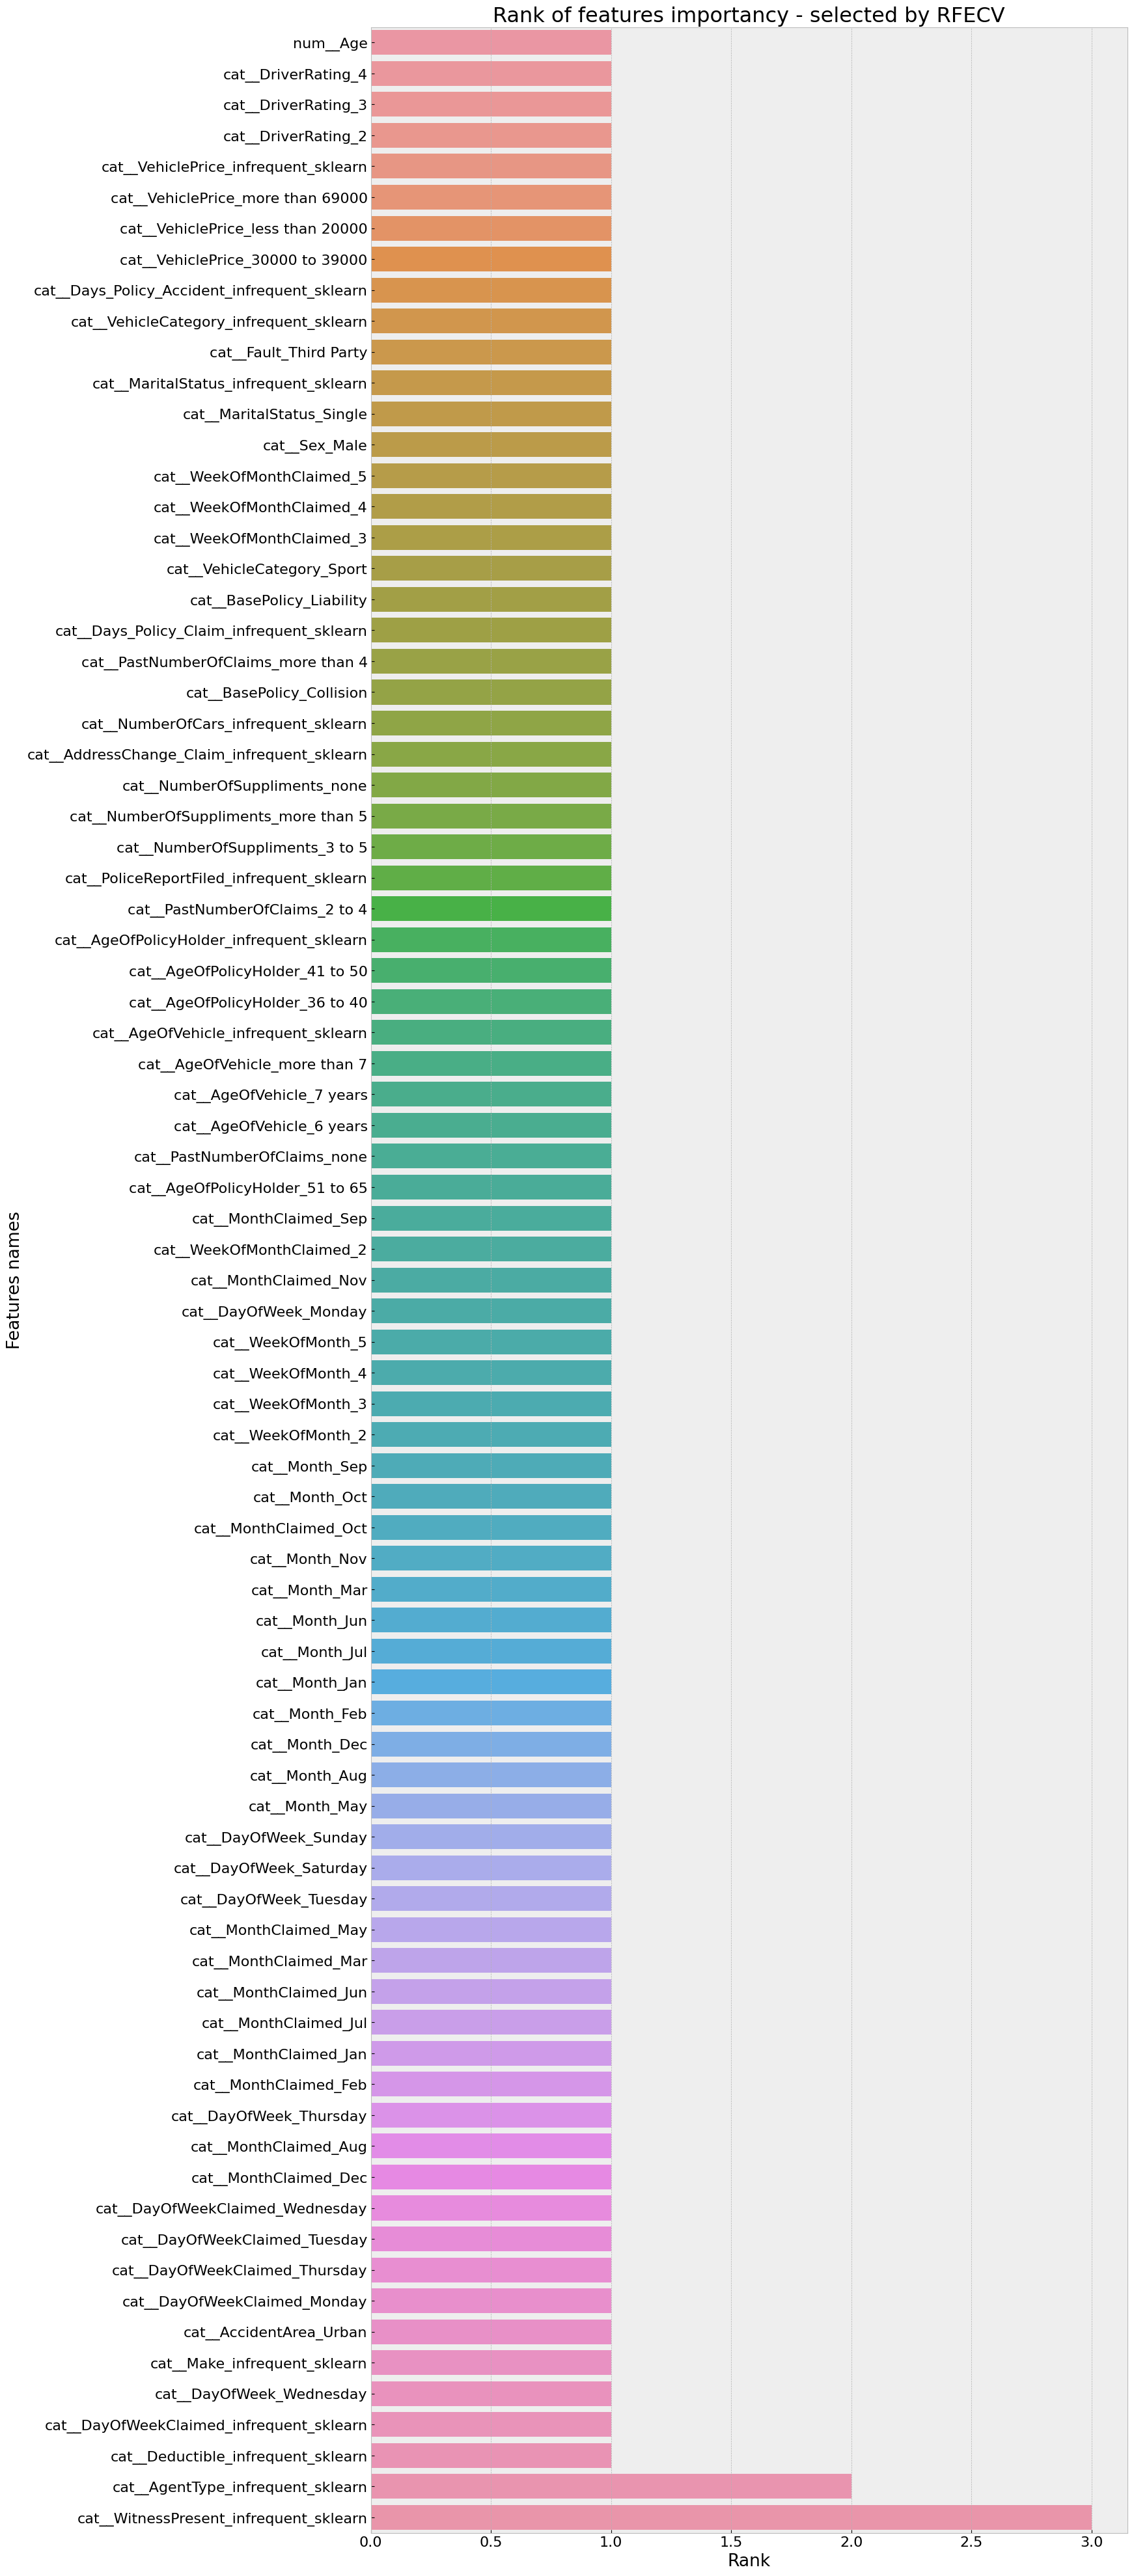

In [72]:
# Make plot of results:
plt.figure(figsize=(15, 50))
sns.barplot(data=rank, x='rank', y='feature_name')
plt.title("Rank of features importancy - selected by RFECV")
plt.xlabel("Rank")
plt.ylabel("Features names")
plt.show()

#### Notes:
- Best features are assigned rank 1,

In [73]:
#selected features:
rfe_cols = X_train_prep.columns[rfecv.support_]
rfe_cols

Index(['num__Age', 'cat__Month_Aug', 'cat__Month_Dec', 'cat__Month_Feb',
       'cat__Month_Jan', 'cat__Month_Jul', 'cat__Month_Jun', 'cat__Month_Mar',
       'cat__Month_May', 'cat__Month_Nov', 'cat__Month_Oct', 'cat__Month_Sep',
       'cat__WeekOfMonth_2', 'cat__WeekOfMonth_3', 'cat__WeekOfMonth_4',
       'cat__WeekOfMonth_5', 'cat__DayOfWeek_Monday',
       'cat__DayOfWeek_Saturday', 'cat__DayOfWeek_Sunday',
       'cat__DayOfWeek_Thursday', 'cat__DayOfWeek_Tuesday',
       'cat__DayOfWeek_Wednesday', 'cat__Make_infrequent_sklearn',
       'cat__AccidentArea_Urban', 'cat__DayOfWeekClaimed_Monday',
       'cat__DayOfWeekClaimed_Thursday', 'cat__DayOfWeekClaimed_Tuesday',
       'cat__DayOfWeekClaimed_Wednesday',
       'cat__DayOfWeekClaimed_infrequent_sklearn', 'cat__MonthClaimed_Aug',
       'cat__MonthClaimed_Dec', 'cat__MonthClaimed_Feb',
       'cat__MonthClaimed_Jan', 'cat__MonthClaimed_Jul',
       'cat__MonthClaimed_Jun', 'cat__MonthClaimed_Mar',
       'cat__MonthClaimed_M

# Try XGBoost classifier:

In [90]:
#Check balance beetween predicted values to evaluate custom weights:
negative_class_count = sum(y_test == 0)
positive_class_count = sum(y_test == 1)
balance_ratio = negative_class_count/positive_class_count

print(f'scale_pos_weight is {balance_ratio}')

scale_pos_weight is 15.67027027027027


In [91]:
#Set up XGBClassifier::
xgb = XGBClassifier(objective = 'binary:logistic', 
                    random_state = 42,
                    n_jobs = -1,
                    reg_alpha = 75,
                    reg_lambda = 15,
                    scale_pos_weight = balance_ratio * 1,
                    early_stopping_rounds = 10,
                    n_estimators = 500
                   )

#Determine the hyperparameter space:
params = {'max_depth': np.arange(2, 15, 2),
          'learning_rate' : np.arange(0.01, 0.1, 0.02)}


#Set up folds with right proportion of target in all folds:
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

#Initiaisisng Randomized Search with crossvalidation:
random_search_xgb = RandomizedSearchCV(estimator = xgb,
                                       param_distributions = params,
                                       cv = cv,
                                       n_iter = 30,
                                       random_state = 42,
                                       n_jobs = -1,
                                       refit = True,
                                       scoring = "roc_auc"
                                       )

In [92]:
#Training Randomized Search to find best hiperparameters:
start_time = time.time()

random_search_xgb.fit(X_train_prep[rfe_cols],
                      y_train,
                      eval_set=[(X_val_prep[rfe_cols], y_val)]
                     )


end_time = time.time()

training_time = end_time - start_time
time_formated = str(timedelta(seconds=training_time))
print(f"Time of training is: {time_formated}")

[0]	validation_0-logloss:0.66496
[1]	validation_0-logloss:0.64339
[2]	validation_0-logloss:0.62498
[3]	validation_0-logloss:0.61055
[4]	validation_0-logloss:0.59758
[5]	validation_0-logloss:0.58755
[6]	validation_0-logloss:0.57840
[7]	validation_0-logloss:0.57205
[8]	validation_0-logloss:0.56525
[9]	validation_0-logloss:0.56087
[10]	validation_0-logloss:0.55566
[11]	validation_0-logloss:0.55292
[12]	validation_0-logloss:0.54969
[13]	validation_0-logloss:0.54614
[14]	validation_0-logloss:0.54424
[15]	validation_0-logloss:0.54086
[16]	validation_0-logloss:0.53914
[17]	validation_0-logloss:0.53703
[18]	validation_0-logloss:0.53500
[19]	validation_0-logloss:0.53390
[20]	validation_0-logloss:0.53163
[21]	validation_0-logloss:0.53142
[22]	validation_0-logloss:0.53028
[23]	validation_0-logloss:0.52881
[24]	validation_0-logloss:0.52858
[25]	validation_0-logloss:0.52726
[26]	validation_0-logloss:0.52697
[27]	validation_0-logloss:0.52658
[28]	validation_0-logloss:0.52595
[29]	validation_0-loglos

In [93]:
random_search_xgb.best_score_

0.8195015459042632

In [94]:
random_search_xgb.best_params_

{'max_depth': 4, 'learning_rate': 0.08999999999999998}

In [95]:
random_search_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08999999999999998,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [96]:
#Selecting the best model:
best_xgb = random_search_xgb.best_estimator_

In [97]:
#Genereate some predictions for data from train set:
y_train_pred = best_xgb.predict(X_train_prep[rfe_cols])
y_train_proba = best_xgb.predict_proba(X_train_prep[rfe_cols])[:,1]

#generate metrics for train set:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

#Genereate some predictions for data from test set:
y_test_pred = best_xgb.predict(X_test_prep[rfe_cols])
y_test_proba = best_xgb.predict_proba(X_test_prep[rfe_cols])[:,1]

#generate metrics for tes set:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# make a table to compare metrics
tmp = pd.DataFrame(data = {
    'set': ['train', 'test'],
    'accuracy': [train_accuracy, test_accuracy], 
    'recall': [train_recall, test_recall], 
    'roc_auc': [train_roc_auc, test_roc_auc]
    })

tmp

set  accuracy  recall  roc_auc
0  train    0.6196  0.9476   0.8497
1   test    0.6196  0.9459   0.8250

In [98]:
# Check confusion matrix:
corr = confusion_matrix(y_test, y_test_pred)

cm_df = pd.DataFrame(corr, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

pred_0  pred_1
true_0    1736    1163
true_1      10     175

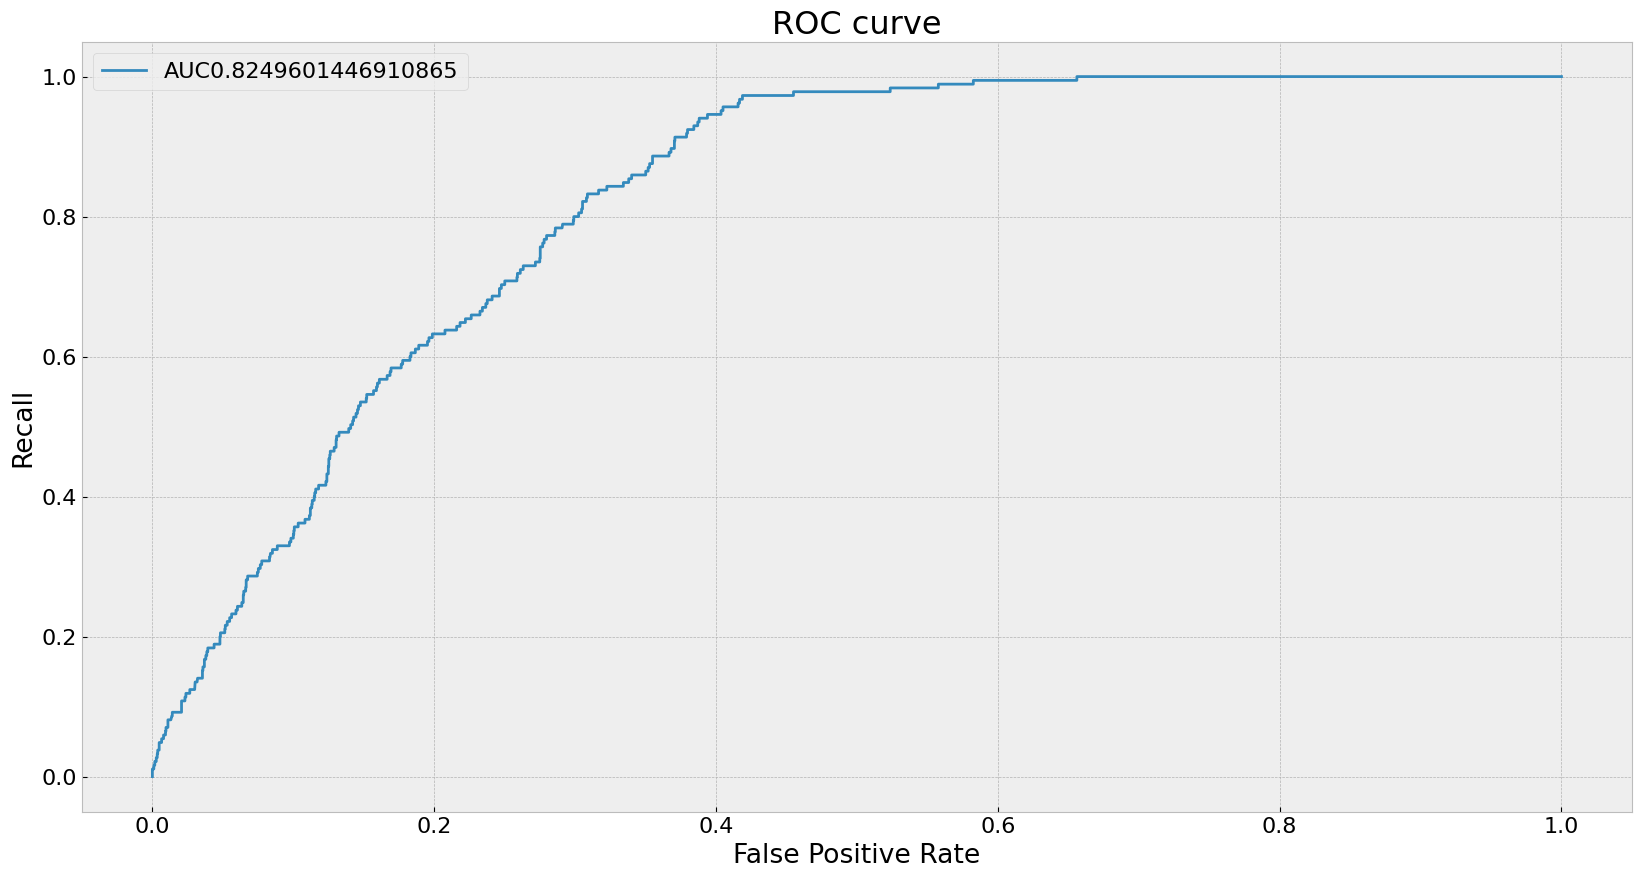

In [99]:
#Initialise roc_curve metrics:
fpr, tpr, thresh = roc_curve(y_test, y_test_proba)
# Plot ROC curve
plt.plot(fpr, tpr, label = 'AUC' + str(test_roc_auc))
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [100]:
#Check the most important scores
pd.set_option('display.float_format', '{:.4f}'.format)
results_xbc = pd.DataFrame(random_search_xgb.cv_results_)
results_xbc = results_xbc[['param_max_depth', 'param_learning_rate', 'mean_test_score', 'std_test_score', 'rank_test_score']]
results_xbc.reset_index(drop = True, inplace = True)
results_xbc.sort_values(by = 'mean_test_score', ascending = False, inplace = True)
results_xbc.head(10)

param_max_depth param_learning_rate  mean_test_score  std_test_score  \
5                4              0.0900           0.8195          0.0161   
4                4              0.0500           0.8192          0.0158   
26               4              0.0700           0.8191          0.0163   
8                4              0.0300           0.8190          0.0157   
9                6              0.0500           0.8179          0.0155   
18               4              0.0100           0.8178          0.0154   
23               6              0.0700           0.8178          0.0155   
10               6              0.0300           0.8178          0.0152   
22               6              0.0900           0.8174          0.0152   
19               6              0.0100           0.8173          0.0153   

    rank_test_score  
5                 1  
4                 2  
26                3  
8                 4  
9                 5  
18                6  
23                7  
10                8  
22                9  
19               10

Text(0, 0.5, 'Mean test score')

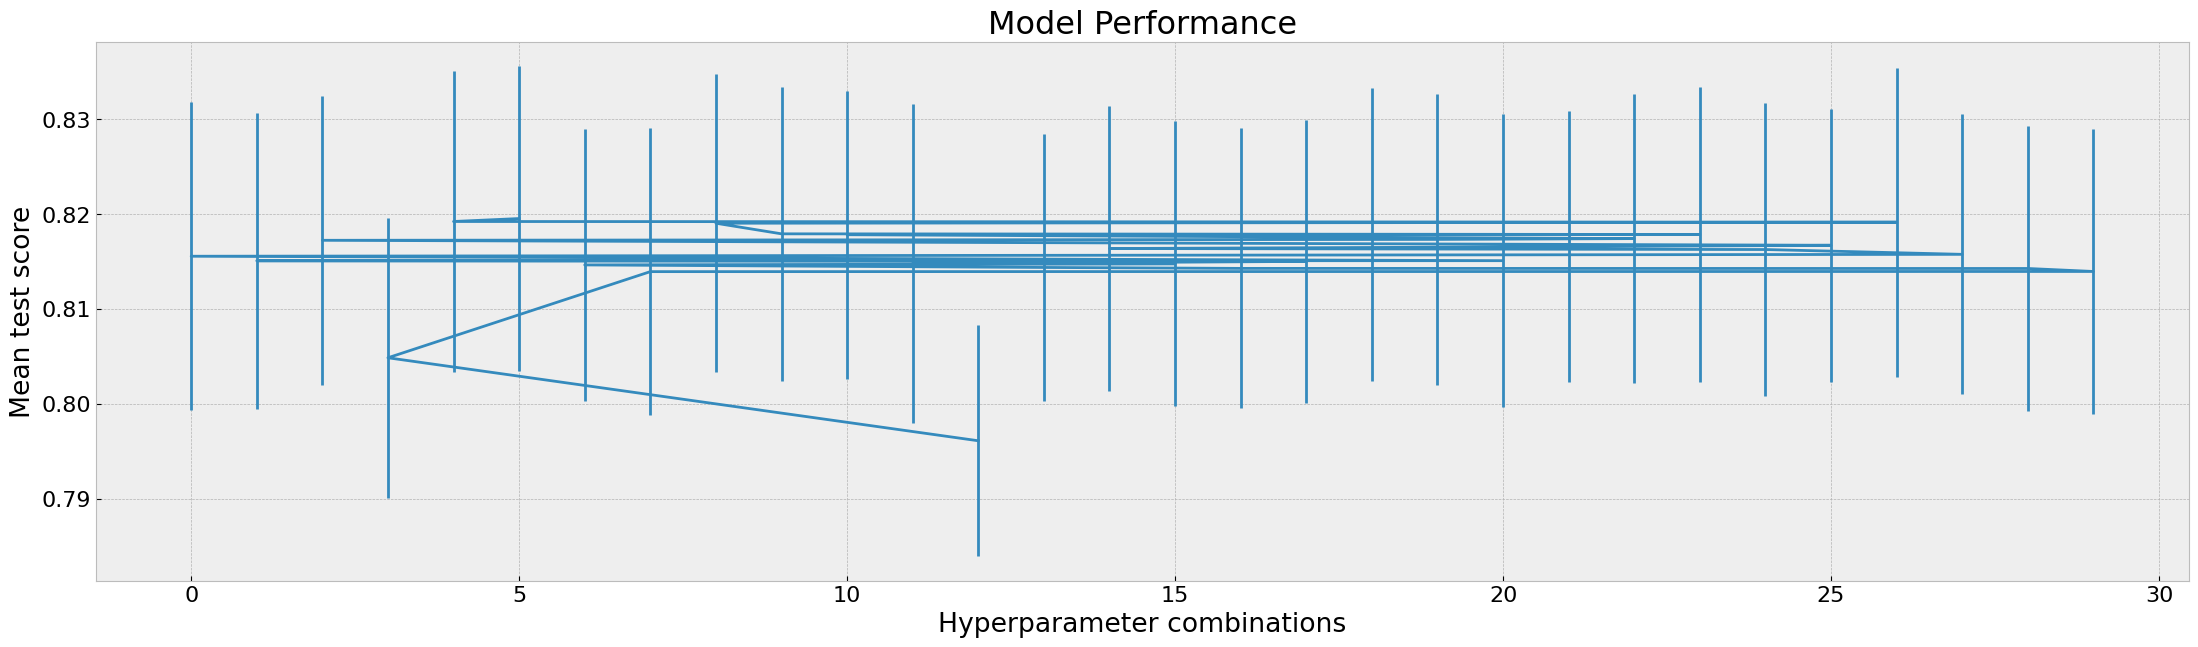

In [101]:
# plot model performance
plt.figure(figsize = (27, 7))
results_xbc['mean_test_score'].plot(yerr = [results_xbc['std_test_score'], results_xbc['std_test_score']])
plt.title('Model Performance')
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Mean test score')

In [102]:
#print scatter of hiperparameter, for better understanding model:
px.scatter(data_frame = results_xbc, 
              x = 'param_max_depth', 
              y = 'param_learning_rate', 
              color = 'rank_test_score',
              title = 'Hyperparameter analyse',
              opacity = 0.7, 
              size_max = 10, 
              height = 950,
              width = 950, 
              template = 'plotly_dark')

#### Notes:
- best values of learning rate is beetween 0.05 and 0.09,
- bests values of max depth is located around 4,

### Use GridSearchCV to fids the bests huperparameter:

In [117]:
# set up XGBClassifier:
xgb = XGBClassifier(objective = 'binary:logistic', 
                        random_state = 42,
                        n_jobs = -1,
                        reg_alpha = 75,
                        reg_lambda = 15,
                        scale_pos_weight = balance_ratio * 1,
                        early_stopping_rounds = 10,
                        n_estimators = 500
                        )

# set up a hyperparametr grid:
grid = {'max_depth': np.arange(2, 8, 1),
        'learning_rate': np.arange(0.05, 0.15, 0.01)}

#Set up folds with right proportion of target in all folds:
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

# set up GridSearchCV:
gs_xbc = GridSearchCV(estimator = xgb,
                      param_grid = grid,
                      cv = cv,
                      n_jobs = -1,
                      refit = True,
                      scoring = 'roc_auc' 
                      )

In [118]:
# Training GridSearchCV to find best hiperparameters:
start_time = time.time()

gs_xbc.fit(X_train_prep[rfe_cols],
           y_train,
           eval_set=[(X_val_prep[rfe_cols], y_val)])

end_time = time.time()

training_time = end_time - start_time
time_formated = str(timedelta(seconds=training_time))
print(f"Time of training is: {time_formated}")

[0]	validation_0-logloss:0.65420
[1]	validation_0-logloss:0.62667
[2]	validation_0-logloss:0.60504
[3]	validation_0-logloss:0.58915
[4]	validation_0-logloss:0.57590
[5]	validation_0-logloss:0.56643
[6]	validation_0-logloss:0.55909
[7]	validation_0-logloss:0.55349
[8]	validation_0-logloss:0.54900
[9]	validation_0-logloss:0.54526
[10]	validation_0-logloss:0.54205
[11]	validation_0-logloss:0.53775
[12]	validation_0-logloss:0.53516
[13]	validation_0-logloss:0.53414
[14]	validation_0-logloss:0.53156
[15]	validation_0-logloss:0.53101
[16]	validation_0-logloss:0.52905
[17]	validation_0-logloss:0.52761
[18]	validation_0-logloss:0.52741
[19]	validation_0-logloss:0.52650
[20]	validation_0-logloss:0.52595
[21]	validation_0-logloss:0.52463
[22]	validation_0-logloss:0.52324
[23]	validation_0-logloss:0.52196
[24]	validation_0-logloss:0.52108
[25]	validation_0-logloss:0.52068
[26]	validation_0-logloss:0.51939
[27]	validation_0-logloss:0.51871
[28]	validation_0-logloss:0.51716
[29]	validation_0-loglos

In [119]:
gs_xbc.best_score_

0.8196737579857942

In [120]:
gs_xbc.best_params_

{'learning_rate': 0.13, 'max_depth': 4}

In [121]:
gs_xbc.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.13, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [122]:
# select best model form gridsearch:
best_gs = gs_xbc.best_estimator_

In [123]:
# Genereate some predictions for data from train set:
y_train_pred = best_gs.predict(X_train_prep[rfe_cols])
y_train_proba = best_gs.predict_proba(X_train_prep[rfe_cols])[:,1]

#generate metrics for train set:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

#Genereate some predictions for data from test set:
y_test_pred = best_gs.predict(X_test_prep[rfe_cols])
y_test_proba = best_gs.predict_proba(X_test_prep[rfe_cols])[:,1]

#generate metrics for tes set:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# make a table to compare metrics
tmp = pd.DataFrame(data = {
    'set': ['train', 'test'],
    'accuracy': [train_accuracy, test_accuracy], 
    'recall': [train_recall, test_recall], 
    'roc_auc': [train_roc_auc, test_roc_auc]
    })

tmp

set  accuracy  recall  roc_auc
0  train    0.6174  0.9476   0.8495
1   test    0.6187  0.9514   0.8254

In [124]:
# Check confusion matrix:
corr = confusion_matrix(y_test, y_test_pred)

cm_df = pd.DataFrame(corr, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

pred_0  pred_1
true_0    1732    1167
true_1       9     176

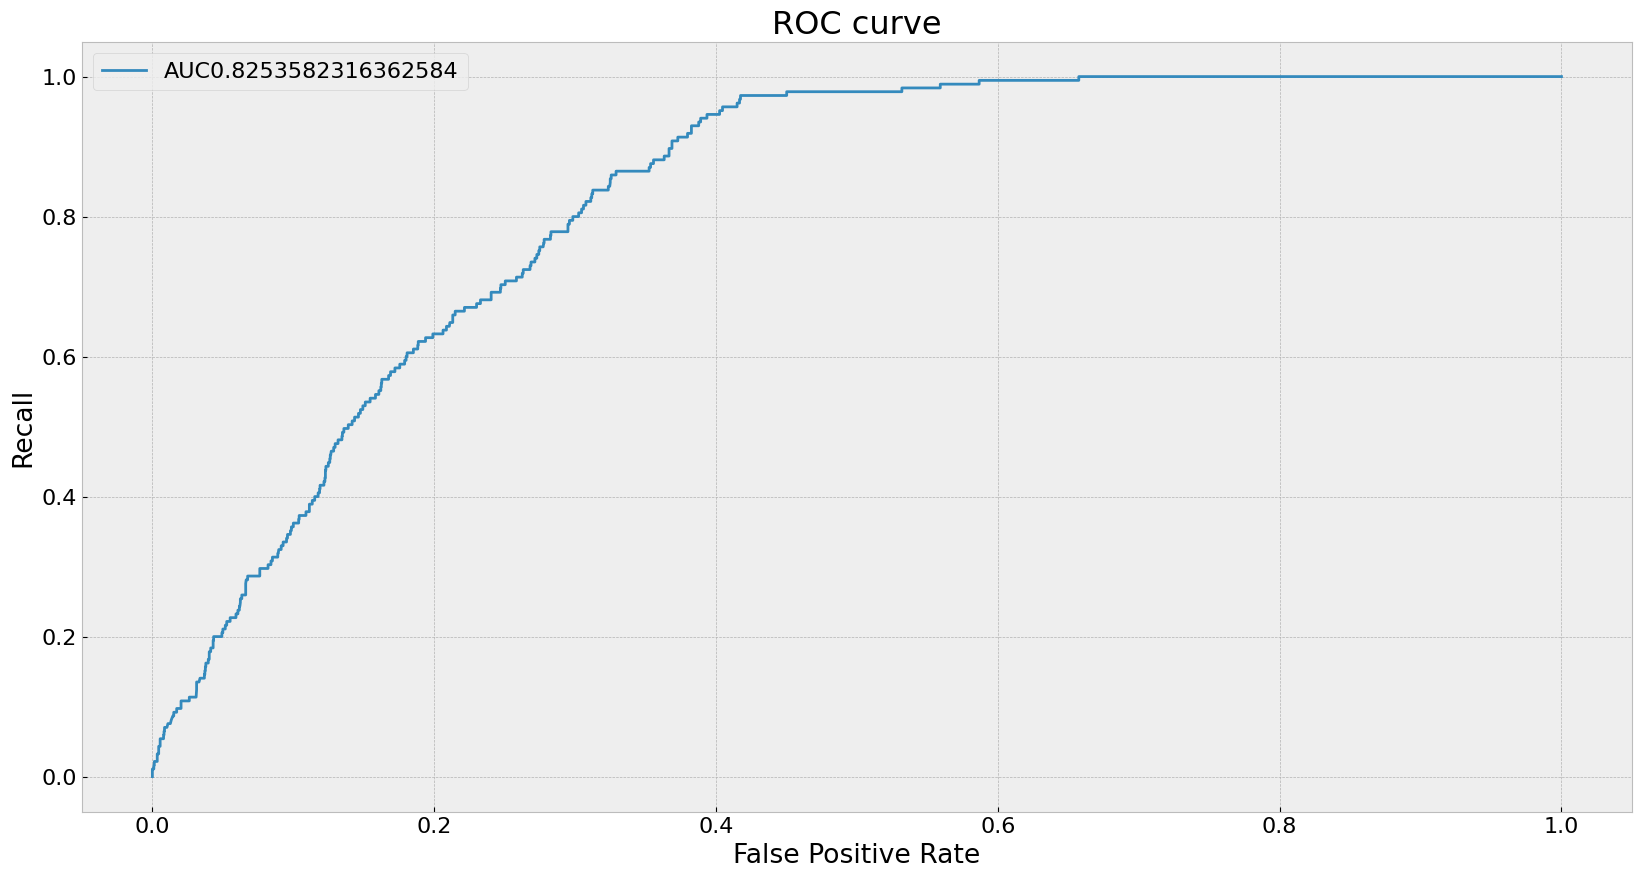

In [125]:
#Initialise roc_curve metrics:
fpr, tpr, thresh = roc_curve(y_test, y_test_proba)
# Plot ROC curve
plt.plot(fpr, tpr, label = 'AUC' + str(test_roc_auc))
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [126]:
#Check the most important scores
pd.set_option('display.float_format', '{:.4f}'.format)
results_xbc = pd.DataFrame(gs_xbc.cv_results_)
results_xbc = results_xbc[['param_max_depth', 'param_learning_rate', 'mean_test_score', 'std_test_score', 'rank_test_score']]
results_xbc.reset_index(drop = True, inplace = True)
results_xbc.sort_values(by = 'mean_test_score', ascending = False, inplace = True)
results_xbc.head(10)

param_max_depth param_learning_rate  mean_test_score  std_test_score  \
50               4              0.1300           0.8197          0.0150   
32               4              0.1000           0.8196          0.0154   
26               4              0.0900           0.8195          0.0161   
51               5              0.1300           0.8195          0.0161   
57               5              0.1400           0.8194          0.0158   
44               4              0.1200           0.8194          0.0164   
20               4              0.0800           0.8194          0.0159   
8                4              0.0600           0.8192          0.0154   
2                4              0.0500           0.8192          0.0158   
14               4              0.0700           0.8191          0.0163   

    rank_test_score  
50                1  
32                2  
26                3  
51                4  
57                5  
44                6  
20                7  
8                 8  
2                 9  
14               10

Text(0, 0.5, 'Mean test score')

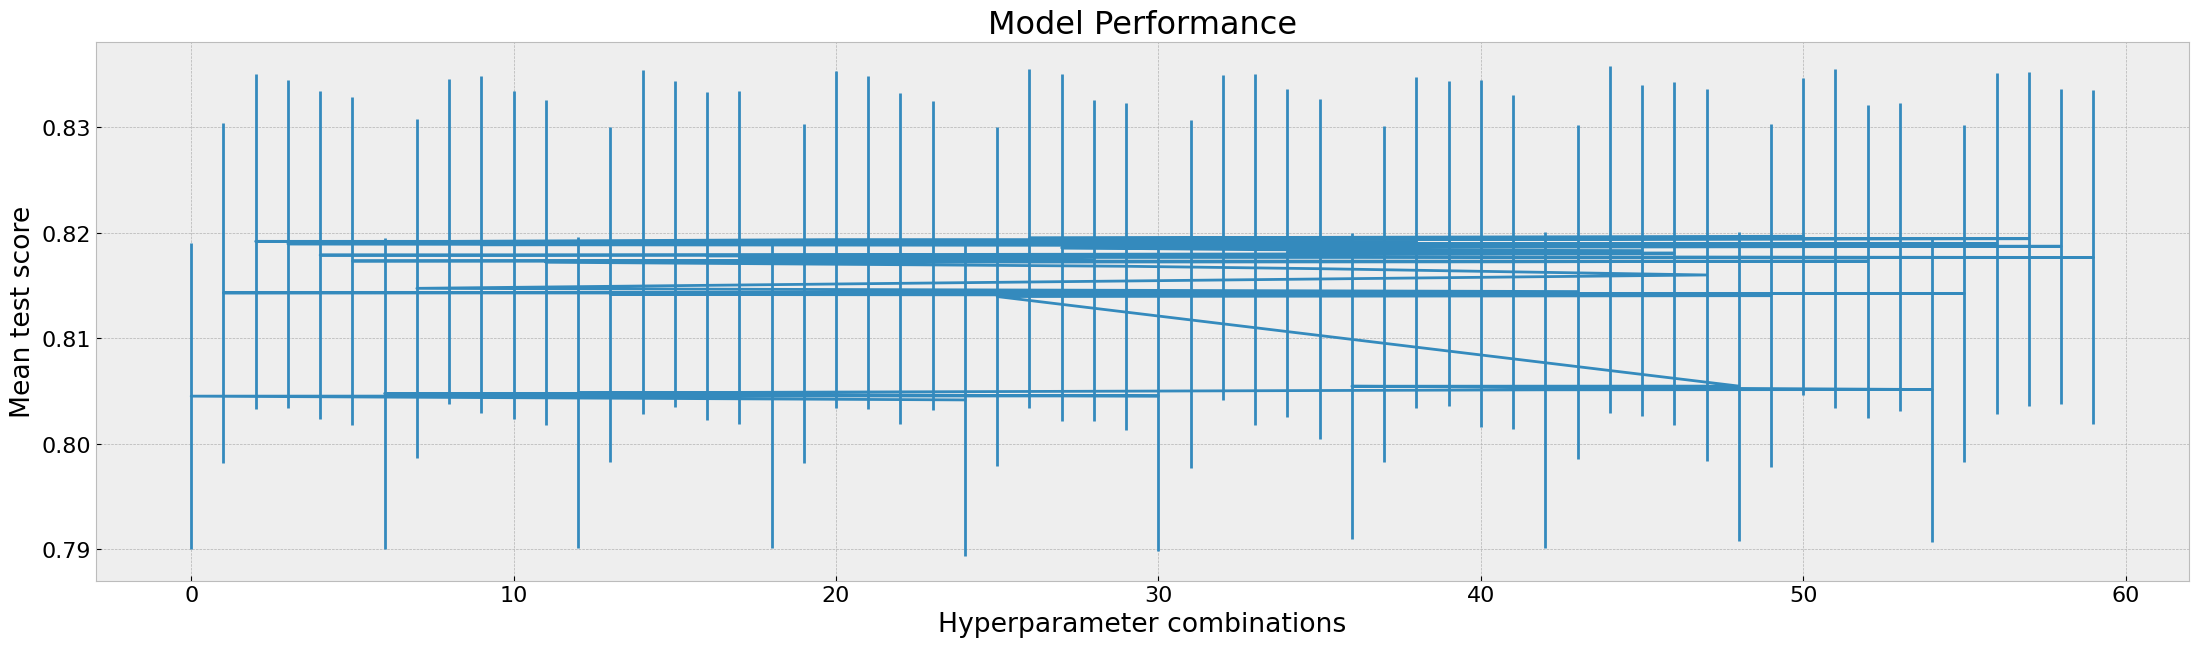

In [127]:
# plot model performance
plt.figure(figsize = (27, 7))
results_xbc['mean_test_score'].plot(yerr = [results_xbc['std_test_score'], results_xbc['std_test_score']])
plt.title('Model Performance')
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Mean test score')

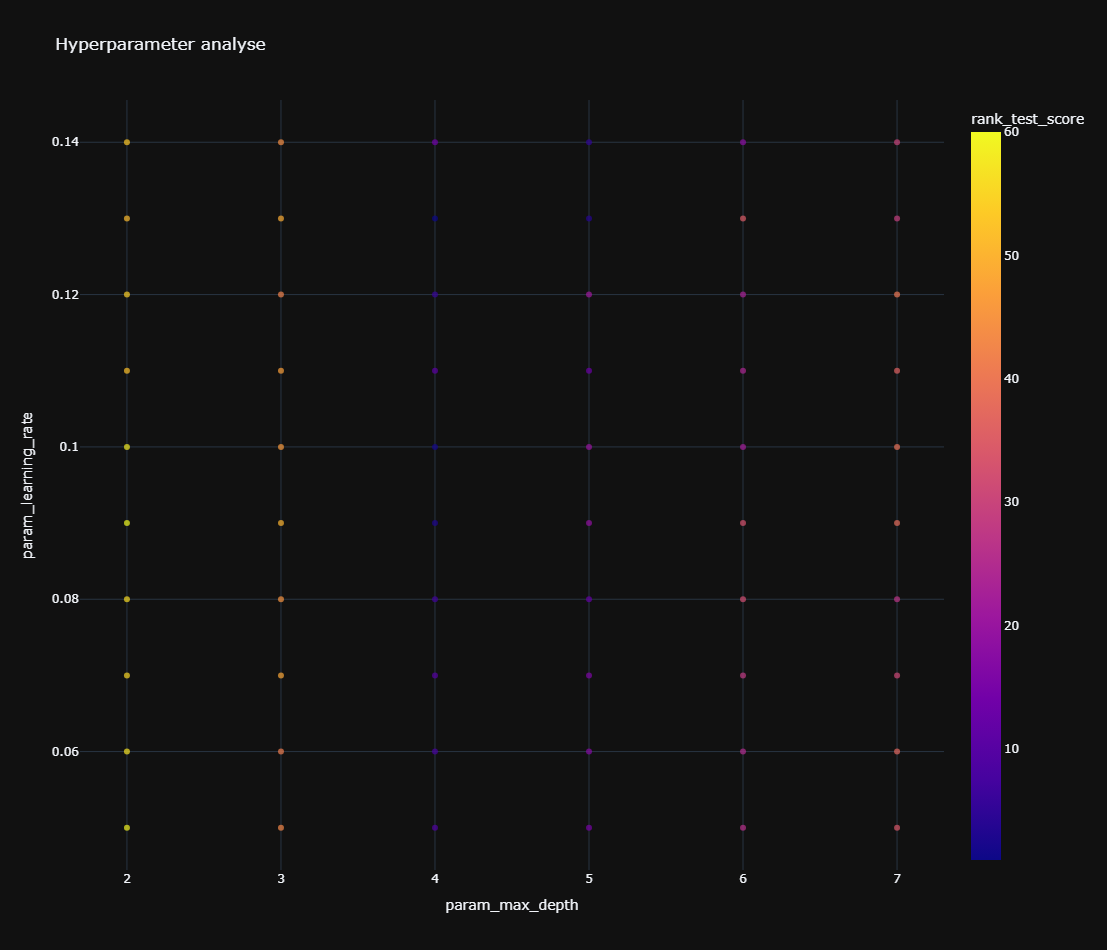

In [128]:
#print scatter of hiperparameter, for better understanding model:
px.scatter(data_frame = results_xbc, 
              x = 'param_max_depth', 
              y = 'param_learning_rate', 
              color = 'rank_test_score',
              title = 'Hyperparameter analyse',
              opacity = 0.7, 
              size_max = 10, 
              height = 950,
              width = 950, 
              template = 'plotly_dark')

### Solving problem with inbalanced target, using SMOTE:

In [141]:
#apply SMOTE to training data, to make set balance of target:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_prep, y_train)

In [142]:
#check amount shape of data, before and after using SMOTE:
print(f'Before SMOTE: {X_train_prep.shape, y_train.shape}')
print(f'After SMOTE: {X_train_resampled.shape, y_train_resampled.shape}')

Before SMOTE: ((9251, 81), (9251,))
After SMOTE: ((17396, 81), (17396,))


In [143]:
#balamce of target in train subset:
y_train_resampled.value_counts()

FraudFound_P
0.0000    8698
1.0000    8698
Name: count, dtype: int64

### Notes:
- target in training set is balanced 50/50 now!

# Apply RandomForestClassifier

In [145]:
#Check balance beetween predicted values to evaluate custom weights:
negative_class_count = sum(y_test == 0)
positive_class_count = sum(y_test == 1)
balance_ratio = negative_class_count/positive_class_count

print(f'scale_pos_weight is {balance_ratio}')

scale_pos_weight is 15.67027027027027


In [147]:
# apply Random Forest Classifier
forest_classifier = RandomForestClassifier(random_state = 42,
                                           class_weight = {0: 1, 1: balance_ratio},
                                           n_jobs = -1)

In [173]:
#Determine the hyperparameter space:
params = {'n_estimators': np.arange(500, 1500, 100),
          'criterion': ['log_loss'],
          'max_depth': np.arange(8, 21, 2),
          'min_samples_split': np.arange(4, 11, 2),
         }
          
#Set up folds with right proportion of target in all folds:
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

#Initiaisisng Randomized Search with crossvalidation:
random_search_forest = RandomizedSearchCV(estimator = forest_classifier,
                                        param_distributions = params,
                                        cv = cv,
                                        n_iter = 50,
                                        random_state = 42,
                                        n_jobs = -1,
                                        refit = True,
                                        scoring = 'roc_auc'
                                        )

In [174]:
#Training Randomized Search to findstart_time = time.time()
start_time = time.time()

random_search_forest.fit(X_train_prep[rfe_cols], y_train)

end_time = time.time()

training_time = end_time - start_time
time_formated = str(timedelta(seconds=training_time))
print(f"Time of training is: {time_formated}")

Time of training is: 0:22:34.810396


In [175]:
random_search_forest.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 15.67027027027027},
                       criterion='log_loss', max_depth=20, min_samples_split=8,
                       n_estimators=700, n_jobs=-1, random_state=42)

In [176]:
random_search_forest.best_score_

0.8021743463505796

In [177]:
random_search_forest.best_params_

{'n_estimators': 700,
 'min_samples_split': 8,
 'max_depth': 20,
 'criterion': 'log_loss'}

In [178]:
#Selecting the best model:
best_rfc = random_search_forest.best_estimator_

In [179]:
#Genereate some predictions for data from train set:
y_train_pred = best_rfc.predict(X_train_prep[rfe_cols])
y_train_proba = best_rfc.predict_proba(X_train_prep[rfe_cols])[:,1]

#generate metrics for train set:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

#Genereate some predictions for data from test set:
y_test_pred = best_rfc.predict(X_test_prep[rfe_cols])
y_test_proba = best_rfc.predict_proba(X_test_prep[rfe_cols])[:,1]

#generate metrics for tes set:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# make a table to compare metrics
tmp = pd.DataFrame(data = {
    'set': ['train', 'test'],
    'accuracy': [train_accuracy, test_accuracy], 
    'recall': [train_recall, test_recall], 
    'roc_auc': [train_roc_auc, test_roc_auc]
    })

tmp

set  accuracy  recall  roc_auc
0  train    0.9959  0.9982   0.9997
1   test    0.9290  0.0270   0.8142

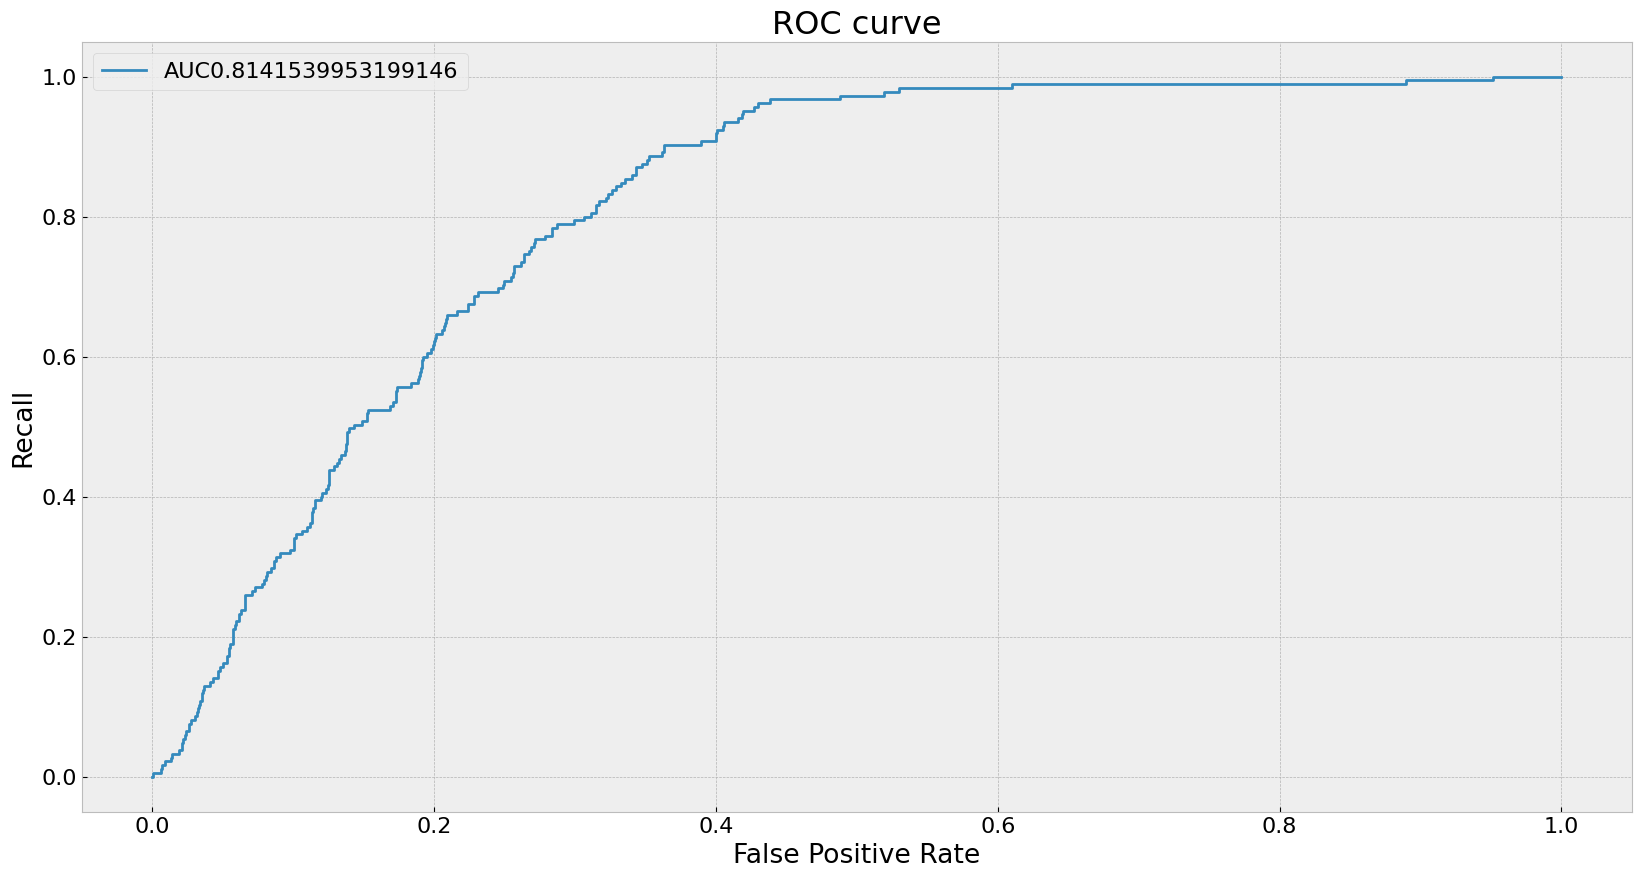

In [180]:
#Initialise roc_curve metrics:
fpr, tpr, thresh = roc_curve(y_test, y_test_proba)
# Plot ROC curve
plt.plot(fpr, tpr, label = 'AUC' + str(test_roc_auc))
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [181]:
pd.set_option('display.float_format', '{:.4f}'.format)
results_rfc = pd.DataFrame(random_search_forest.cv_results_)
results_rfc.head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         5.8717        0.4139           0.4895          0.2338   
1        11.7017        0.6572           1.0616          0.3822   
2         6.0311        0.7636           0.4799          0.2308   
3        16.0159        1.0480           0.9685          0.5487   
4         8.9941        0.7998           0.8576          0.4675   

  param_n_estimators param_min_samples_split param_max_depth param_criterion  \
0                800                      10               8        log_loss   
1               1300                       8              12        log_loss   
2                500                       4              20        log_loss   
3               1400                       6              20        log_loss   
4                900                      10              14        log_loss   

                                              params  split0_test_score  \
0  {'n_estimators': 800, 'min_samples_split': 10,...             0.7830   
1  {'n_estimators': 1300, 'min_samples_split': 8,...             0.7773   
2  {'n_estimators': 500, 'min_samples_split': 4, ...             0.7858   
3  {'n_estimators': 1400, 'min_samples_split': 6,...             0.7888   
4  {'n_estimators': 900, 'min_samples_split': 10,...             0.7805   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0             0.8085             0.7756             0.8066             0.7717   
1             0.8129             0.7807             0.8068             0.7704   
2             0.8122             0.7878             0.8122             0.7755   
3             0.8111             0.7846             0.8109             0.7768   
4             0.8117             0.7818             0.8110             0.7732   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0             0.8210             0.7653             0.7932             0.7953   
1             0.8281             0.7651             0.8043             0.7908   
2             0.8388             0.7762             0.8234             0.7968   
3             0.8401             0.7750             0.8338             0.7987   
4             0.8368             0.7735             0.8128             0.7987   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.7861           0.7906          0.0168               47  
1             0.7893           0.7926          0.0191               34  
2             0.7897           0.7998          0.0200               12  
3             0.7943           0.8014          0.0213                7  
4             0.7878           0.7968          0.0199               20

In [182]:
#Check the most important scores
pd.set_option('display.float_format', '{:.4f}'.format)
results_rfc = pd.DataFrame(random_search_forest.cv_results_)
tmp = results_rfc[['param_n_estimators', 'param_min_samples_split', 'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']]
tmp.reset_index(drop = True, inplace = True)
tmp.sort_values(by = 'mean_test_score', ascending = False, inplace = False).head(10)

param_n_estimators param_min_samples_split param_max_depth  \
20                700                       8              20   
41                900                       8              20   
21               1300                       8              20   
10                600                       8              18   
29               1200                      10              20   
42               1200                      10              18   
3                1400                       6              20   
45               1000                       4              20   
12                700                       8              18   
23               1300                      10              18   

    mean_test_score  std_test_score  rank_test_score  
20           0.8022          0.0223                1  
41           0.8021          0.0220                2  
21           0.8019          0.0216                3  
10           0.8017          0.0208                4  
29           0.8017          0.0212                5  
42           0.8015          0.0215                6  
3            0.8014          0.0213                7  
45           0.8013          0.0206                8  
12           0.8012          0.0206                9  
23           0.8012          0.0212               10

Text(0, 0.5, 'Mean test score')

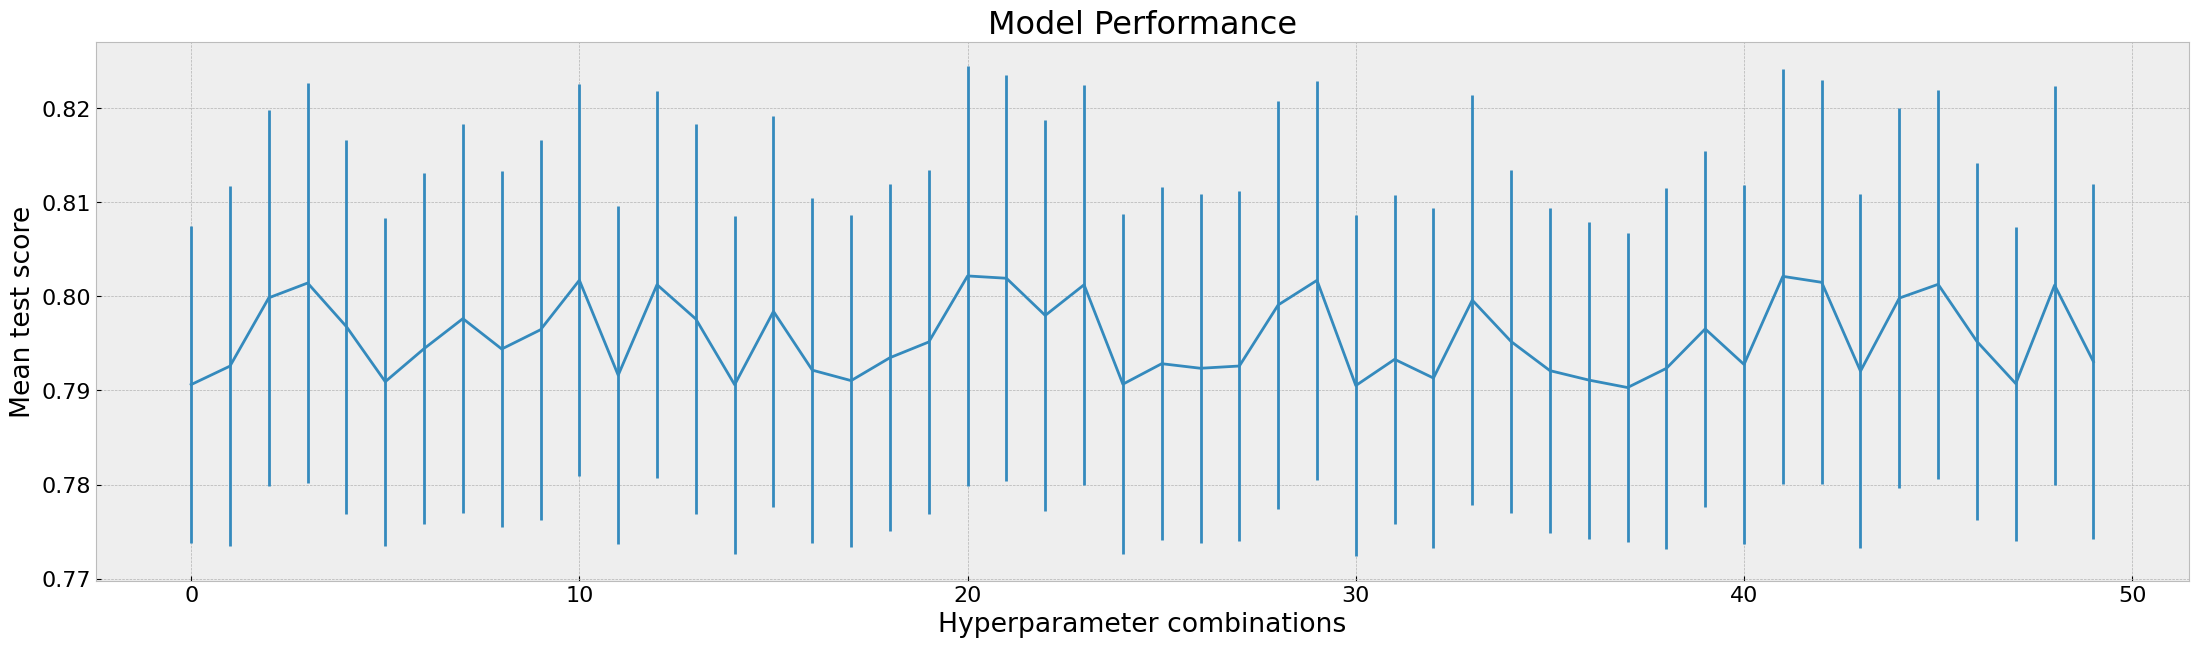

In [183]:
# plot model performance
plt.figure(figsize = (27, 7))
results_rfc['mean_test_score'].plot(yerr = [results_rfc['std_test_score'], results_rfc['std_test_score']])
plt.title('Model Performance')
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Mean test score')

In [184]:
# print scatter of hiperparameter, for better understanding model:
px.scatter_3d(data_frame = results_rfc, 
              x = 'param_n_estimators', 
              y = 'param_min_samples_split', 
              z = 'param_max_depth',
              title = 'Hyperparameter analyse',
              color = 'rank_test_score', 
              opacity = 0.7, 
              size_max = 10, 
              height = 950,
              width = 950, 
              template = 'plotly_dark')

#### Use GridSearchCV to select final hyperparameters:
 

In [88]:
#Determine the hyperparameter space:
# grid = {'n_estimators': np.arange(100, 800, 100),
#           'criterion': ['log_loss'],
#           'max_depth': np.arange(2, 10, 2),
#           'min_samples_split': [2, 4, 6, 8],
#          }
          
# #Set up folds with right proportion of target in all folds:
# cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

# #Initiaisisng Randomized Search with crossvalidation:
# grid_search_forest = GridSearchCV(estimator = forest_classifier,
#                                     param_distributions = grid,
#                                     cv = cv,
#                                     n_jobs = -1,
#                                     refit = True,
#                                     scoring = 'roc_auc'
#                                     )


In [89]:
#Training Randomized Search to findstart_time = time.time()
# start_time = time.time()

# grid_search_forest.fit(X_train_resampled[rfe_cols], y_train_resampled)

# end_time = time.time()

# training_time = end_time - start_time
# time_formated = str(timedelta(seconds=training_time))
# print(f"Time of training is: {time_formated}")

In [115]:
#save the best model:
# with open(f'{BASE_DIR}/model_pickle', 'wb') as file:
#     pickle.dump(best_xgb, file)

In [187]:
!pip freeze > full_requirements.txt